In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print
import openpyxl
sns.set_theme(style="whitegrid")


In [10]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [11]:
#import data files
df_team_pg = pd.read_csv('data/team_pergame.csv')
df_team_total = pd.read_csv('data/team_total.csv')
df_team_advanced = pd.read_csv('data/team_advanced.csv')
df_team_shooting = pd.read_csv('data/team_shooting.csv')
df_league_champs = pd.read_csv('data/league_champs.csv')

# Objective of Analysis
**Goal**: To determine what player/players a team would need to pick up to be a championship contender

Most NBA teams have some Superstar or Allstar players on their team. Usually a team is built around this core number of players to create a NBA championship team. Each Superstar/Allstar player has their own strenght and weakness. In order to build around these players, we would need to fill those gaps. 

Before we deep dive into player specifics, we need to understand what makes a championship team. What is the player makeup of a NBA championship team? We can utilize the team tables to gain an understanding of what stats and trends.

We will conduct some Exploratory Data Analysis on the teams table with the league champions table to gain a general idea of trends/patterns. With this initial information, we can then formulate more detailed questions to be asked.
 

## EDA - Teams Data
- Check for duplicates and nulls
- Look at number of rows and columns
- Check datatypes for each column
- Describe function for each table

In [12]:
#Create a function to display inital table overview

def table_summary (df):
    print('[underline][bold]Table Data Summary[/bold][/underline]')
    #Display first 5 rows of table
    display(df.head(5))
    print('\n')

    #Display number null values
    print('[underline][bold]Null Values[/bold][/underline]')
    display(df.isnull().sum())
    print('\n')

    #Print number of duplicated rows
    print(f'Number of duplicated rows = {df.duplicated().sum()}')
    print('\n')

    #Print out shape of table to determine number of rows and headers
    print(f'Table shape: {df.shape}')
    print('\n')
    
    #PDisplay table describe statistics
    print('[underline][bold]Table Describe[/bold][/underline]')
    display(df.describe())
    print('\n')

    #Display Data types of each column
    print('[underline][bold]Column Data Types[/bold][/underline]')
    display(df.dtypes)
    print('\n')

### Team Totals

In [13]:
table_summary(df_team_total)

Table Data Summary

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Orlando Magic*,82,19930,3460,6899,0.502,523,1412,0.370,2937,5487,0.535,1648,2465,0.669,1149,2457,3606,2281,672,488,1297,1726,9091,1995
1,Phoenix Suns*,82,19830,3356,6967,0.482,584,1584,0.369,2772,5383,0.515,1777,2352,0.756,1027,2403,3430,2198,687,312,1167,1839,9073,1995
2,Seattle SuperSonics*,82,19830,3310,6741,0.491,491,1305,0.376,2819,5436,0.519,1944,2564,0.758,1068,2337,3405,2115,917,392,1295,2067,9055,1995
3,San Antonio Spurs*,82,19855,3236,6687,0.484,434,1158,0.375,2802,5529,0.507,1836,2487,0.738,1029,2661,3690,1919,656,456,1246,1871,8742,1995
4,Utah Jazz*,82,19780,3243,6339,0.512,301,801,0.376,2942,5538,0.531,1939,2483,0.781,874,2412,3286,2256,758,392,1289,2045,8726,1995


Null Values

Team    0
G       0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
Year    0
dtype: int64

Number of duplicated rows = 0

Table shape: (918, 25)

Table Describe

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,79.689542,19265.458606,3010.141612,6606.510893,0.455252,605.007625,1692.605664,0.355308,2405.133987,4913.908497,0.491260,1456.051198,1924.283224,0.757405,899.668845,2491.557734,3391.228758,1791.906318,612.666667,392.334423,1163.319172,1683.755991,8081.339869,2009.640523
std,6.702798,1621.337079,334.219502,648.155217,0.017187,247.647177,667.884929,0.020233,273.241854,636.421865,0.030711,201.548078,270.766758,0.030608,142.615701,279.089094,326.202518,242.764292,84.278786,72.962340,137.266814,210.960672,921.281914,8.620901
min,50.000000,12025.000000,1539.000000,3561.000000,0.401000,98.000000,371.000000,0.264000,1327.000000,2761.000000,0.421000,745.000000,1077.000000,0.660000,472.000000,1293.000000,1788.000000,782.000000,316.000000,169.000000,641.000000,935.000000,4095.000000,1995.000000
25%,82.000000,19755.000000,2911.500000,6438.750000,0.444000,422.250000,1198.250000,0.344000,2303.000000,4547.000000,0.470000,1348.250000,1756.500000,0.739250,802.000000,2387.500000,3306.000000,1679.000000,562.000000,345.000000,1094.250000,1575.000000,7802.250000,2002.000000
50%,82.000000,19805.000000,3033.500000,6682.500000,0.455000,545.000000,1514.500000,0.355000,2460.000000,5064.500000,0.486000,1469.000000,1941.000000,0.758000,902.000000,2507.000000,3445.000000,1795.500000,613.000000,389.000000,1175.500000,1701.000000,8125.500000,2010.000000
75%,82.000000,19855.000000,3178.750000,6967.000000,0.467000,785.000000,2169.000000,0.369000,2578.750000,5367.000000,0.510000,1584.750000,2100.000000,0.778000,993.750000,2661.000000,3568.000000,1930.750000,664.750000,438.750000,1246.000000,1823.000000,8547.000000,2017.000000
max,82.000000,20080.000000,3855.000000,7739.000000,0.512000,1363.000000,3721.000000,0.428000,2978.000000,6211.000000,0.589000,2044.000000,2743.000000,0.839000,1514.000000,3316.000000,4078.000000,2522.000000,987.000000,663.000000,1557.000000,2223.000000,10110.000000,2024.000000


Column Data Types

Team     object
G         int64
MP        int64
FG        int64
FGA       int64
FG%     float64
3P        int64
3PA       int64
3P%     float64
2P        int64
2PA       int64
2P%     float64
FT        int64
FTA       int64
FT%     float64
ORB       int64
DRB       int64
TRB       int64
AST       int64
STL       int64
BLK       int64
TOV       int64
PF        int64
PTS       int64
Year      int64
dtype: object

Team Total 
- No null or duplicate values
- All data types are correctly formatted
- 918 rows and 25 columns
- many columns have a large standard deviation - data is very dispersed

In [14]:
#Creating function to plot out NBA statistics over the years
def team_plots(df, row_num = 7, col_num = 3):
    #View the per game stats over the years
    #reset index so that Year header is inline with other headers
    df_avg = df.groupby('Year').mean(numeric_only = True).reset_index()

    #Removing first 3 columns as we do not need to plot Team, or Games
    col_name = df_avg.columns[3:].to_list()

    fig, axs = plt.subplots(row_num, col_num, figsize = (20,16))
    plt.subplots_adjust(hspace = 0.5)

    for n, col_name in enumerate(col_name):
        ax = plt.subplot(row_num, col_num, n + 1)

        ax.plot(df_avg['Year'], df_avg[col_name])
        ax.axhline(np.mean(df_avg[col_name]), linestyle = "--", color = 'r')

        plt.title(col_name)
        plt.xlabel('Year')
    
    plt.tight_layout()
    plt.show()

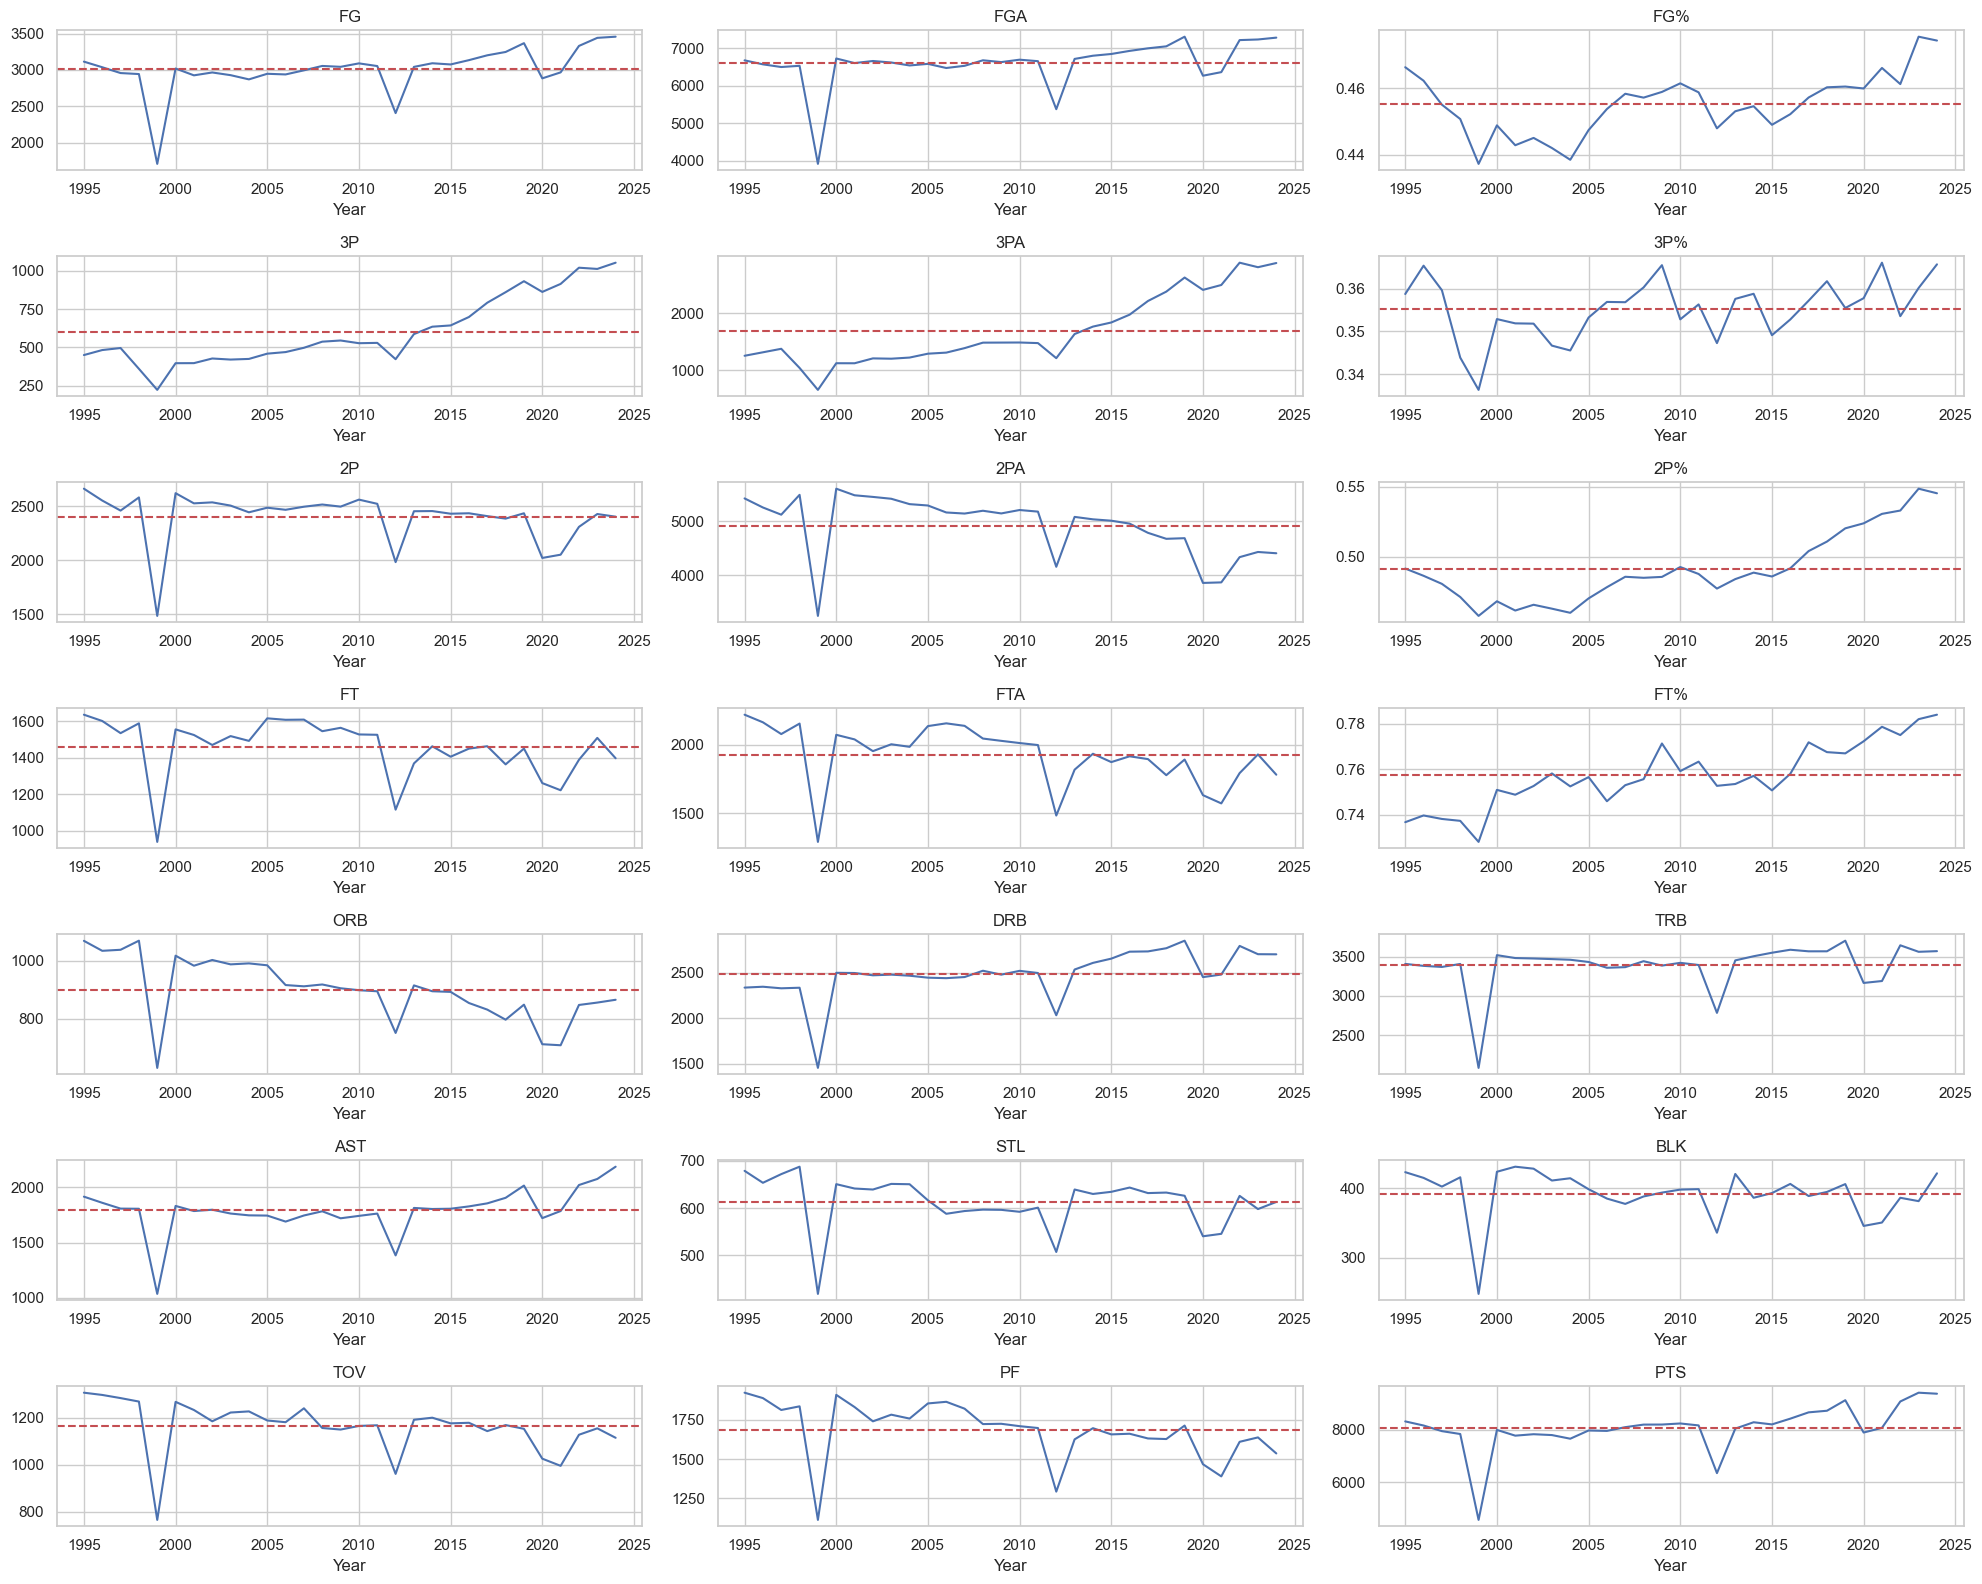

In [15]:
team_plots(df_team_total)

**Observations**

Biggest takeway for modern NBA
- Slightly high number of field goals attempted
- Higher number of 3-points and 3 points attempted, less 2-points and 2 points attempted
- Efficiency is higher 
- Decrease in  Offensive rebounds, but increase in Defensive rebounds
- More points are scored
- Less personal fouls which leads to less free throws attempted
- increase number of assits


Based on the takeaways above, modern NBA strategy is focusing more on shooting 3-points and having a higher efficiency shooting percentage. It seems like there is more team-play as the assits have increased. In addition, there are less fouls taken leading to less free throws attempted. This might be due to the high effiency of shooting in the NBA leading to lower personal fouls. Defensive play has increased based on the increase in defensive rebounds vs offensive rebounds.

There is a massive drop in all graphs near 1998-1999 due to a NBA lockout. 


To get a better look at what a championship team looks like, we will need to combine the leage champion data with the team total data. With the combined data, we can look at the stats of just the championships teams.

In [96]:
#View league champion table
df_league_champs.head(3)

,Season,Lg,Champion,MVP,Rookie of the Year,Points,Rebounds,Assists,Win Shares
0,2024,NBA,Boston Celtics,N. Jokić,V. Wembanyama,L. Dončić (2370),D. Sabonis (1120),T. Haliburton (752),N. Jokić (17.0)
1,2023,NBA,Denver Nuggets,J. Embiid,P. Banchero,J. Tatum (2225),D. Sabonis (973),T. Young (741),N. Jokić (14.9)
2,2022,NBA,Golden State Warriors,N. Jokić,S. Barnes,T. Young (2155),N. Jokić (1019),T. Young (737),N. Jokić (15.2)


In [4]:
#Add new column indicating whether team won championship
#Change 'Season" header to 'Year' and 'Champion' to 'Team'
df_league_champs.rename(columns = {'Season': 'Year','Champion':'Team'}, inplace = True)

#Filter only season and champion columns in league champs table
df_league_champs_adj = df_league_champs[['Year','Team']]

#Remove astericks from team name
df_team_total['Team'] = df_team_total['Team'].str.replace('*','', regex = False)

#Merge tables with indicator showing whether team won championship
df_team_total_champs = pd.merge(df_team_total, df_league_champs_adj, how = 'left', on = ['Year', 'Team'], indicator = True)

df_team_total_champs['champion'] = df_team_total_champs['_merge'].apply(lambda x: 1 if x == 'both' else 0)

df_team_total_champs.drop(columns = ['_merge'], inplace = True)

**Summary plots for championship teams**

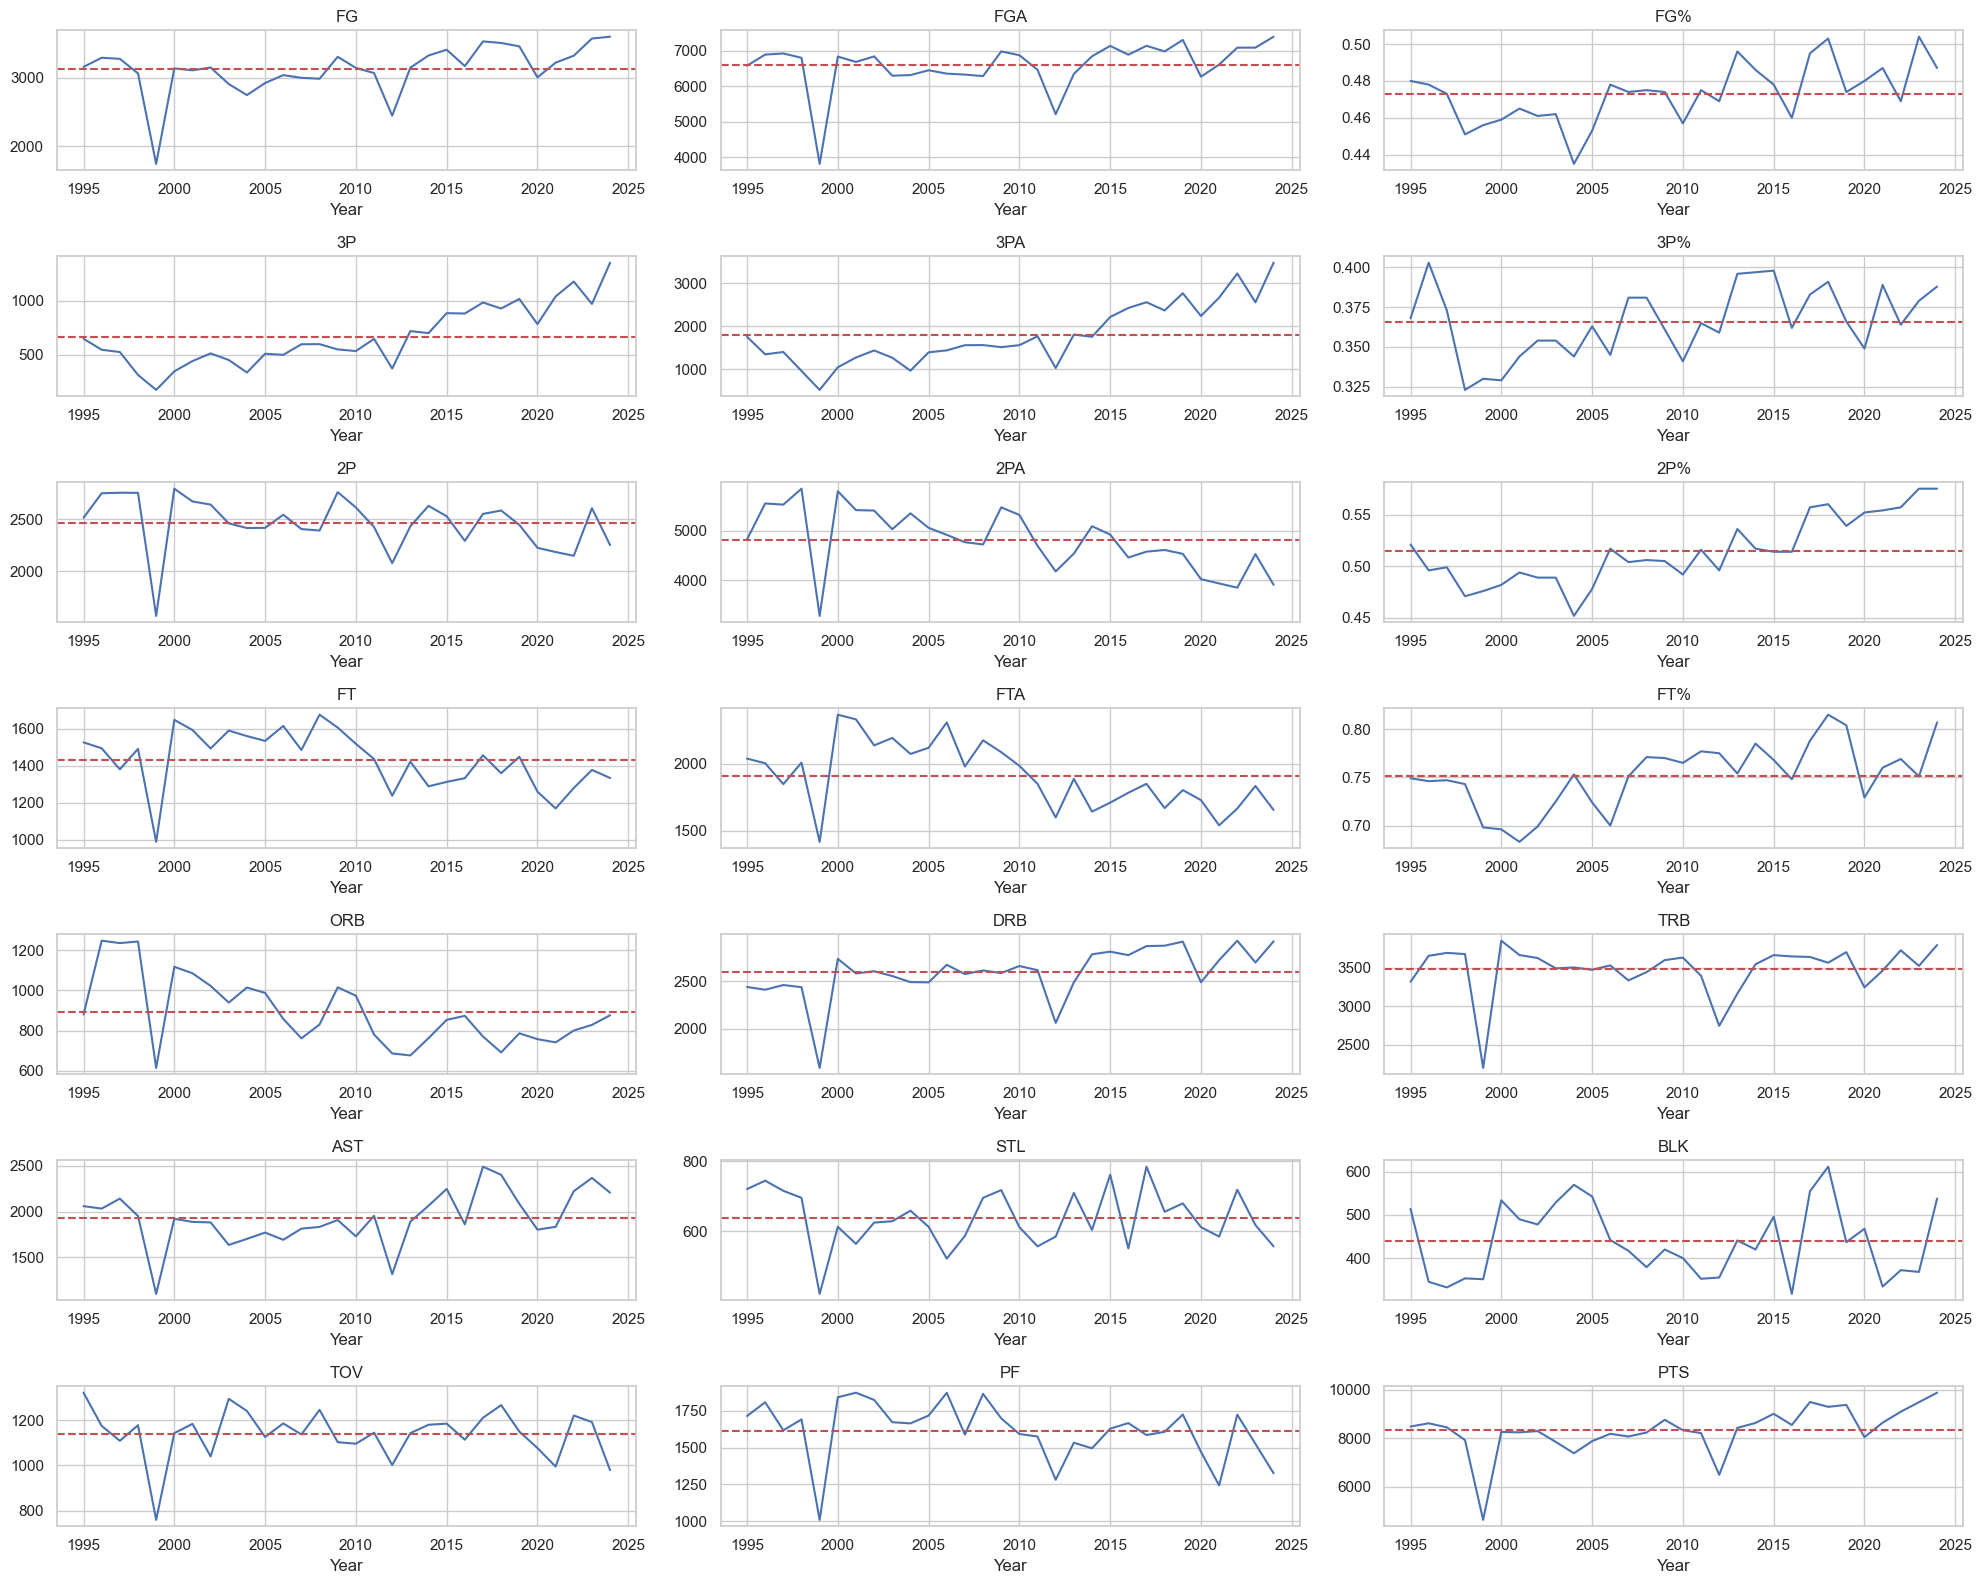

In [98]:
team_plots(df_team_total_champs[df_team_total_champs['champion'] == 1].iloc[:,:-1])

Similar to anlaysis for all NBA teams, the NBA champions have the same trends stated above.

In [99]:
df_team_total_champs.head(2)

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,champion
0,Orlando Magic,82,19930,3460,6899,0.502,523,1412,0.370,2937,5487,0.535,1648,2465,0.669,1149,2457,3606,2281,672,488,1297,1726,9091,1995,0
1,Phoenix Suns,82,19830,3356,6967,0.482,584,1584,0.369,2772,5383,0.515,1777,2352,0.756,1027,2403,3430,2198,687,312,1167,1839,9073,1995,0


### Lets view the distribution

In [100]:
#Creating function to plot histogram of all columns
def create_hist_plots(df, row_num = 4, col_num = 4):
    col_name = df.columns.to_list()

    fig, axs = plt.subplots(row_num, col_num, figsize = (20,16))
    plt.subplots_adjust(hspace=0.5)

    for n, col in enumerate(col_name):
        ax = plt.subplot(row_num, col_num, n+1)

        ax.hist(df[col])
      
        ax.axvline(df[col].mean(), linestyle = '--', c = 'r')
        ax.axvline(df[col].median(), linestyle = '-', c = 'g')

        plt.title(col)
    
    plt.tight_layout()
    plt.show()

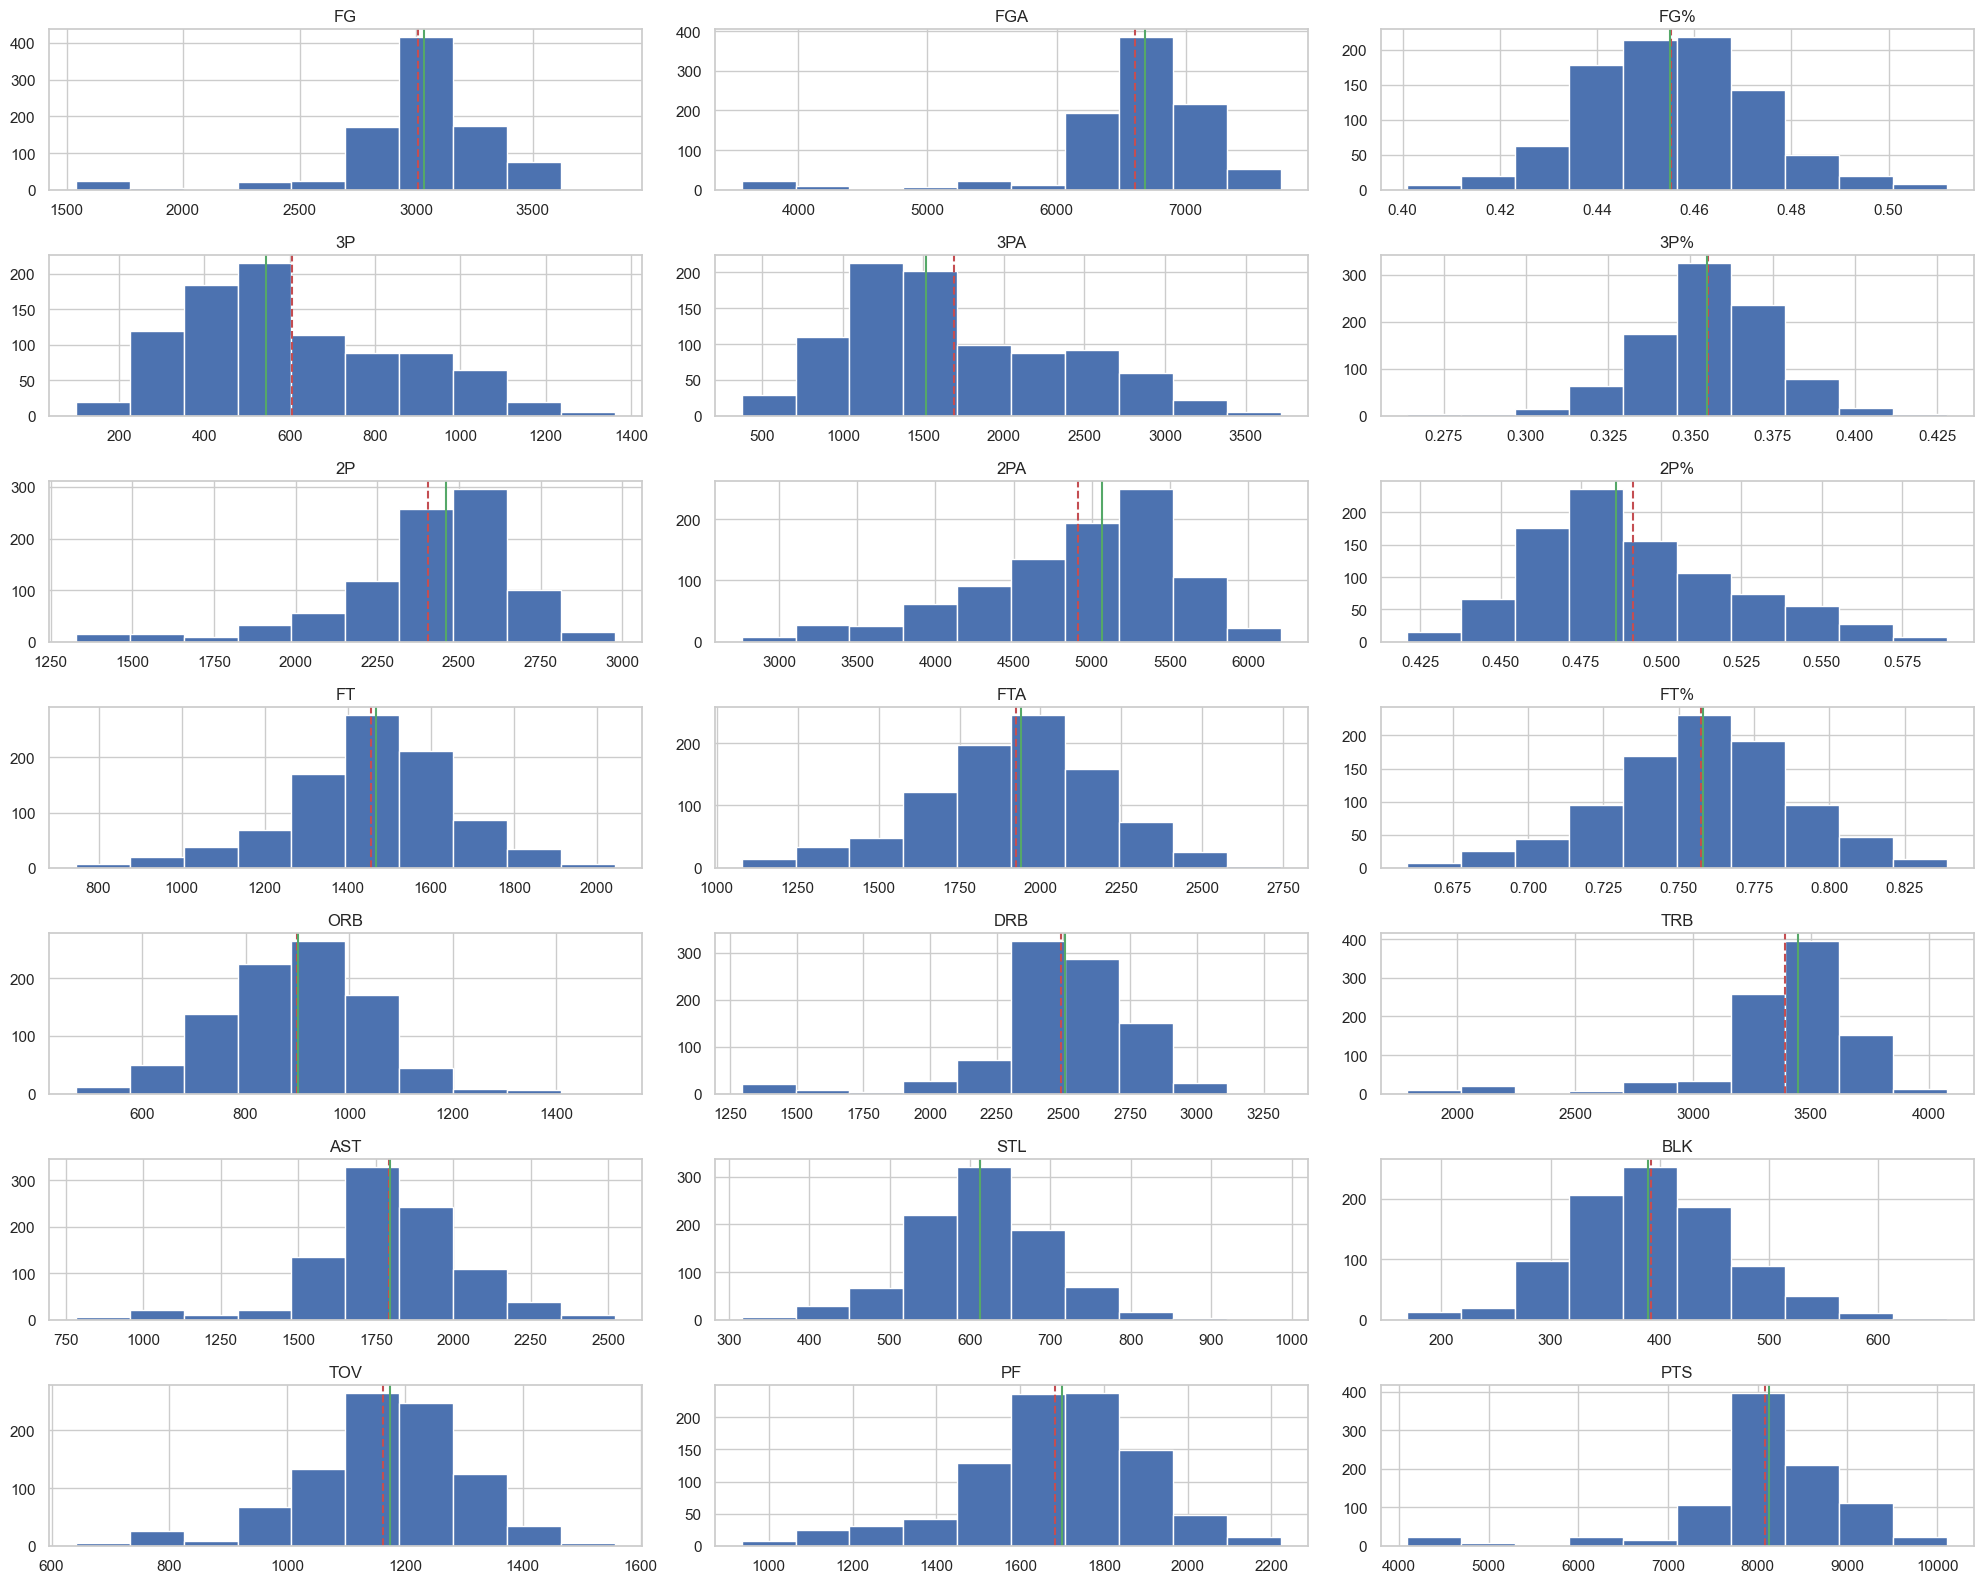

In [101]:
columns_drop = ['G','MP','Year','champion']

create_hist_plots(df_team_total_champs.drop(columns = columns_drop).select_dtypes('number'), row_num = 7, col_num = 3)

Based on the histograms above, about 1/3 of the features have a fairly normally distribution.

The following features have 

[]

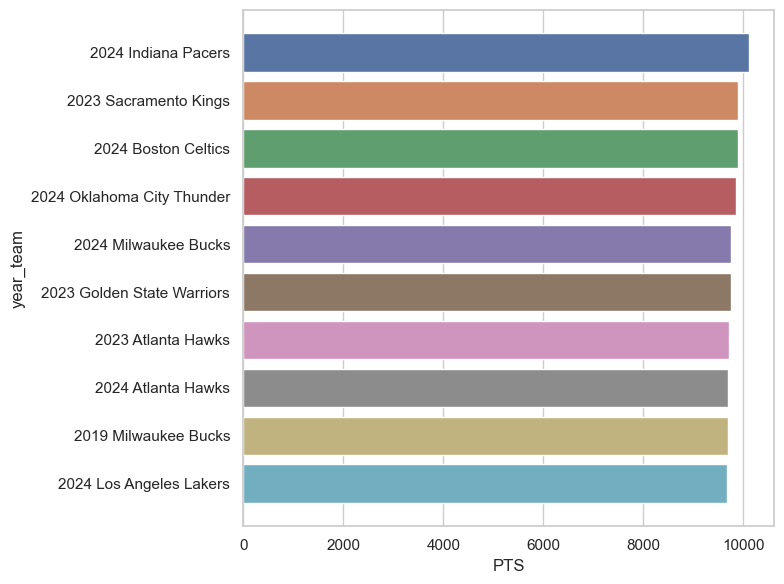

In [102]:
#Points - Top 5 teams
df_team_total_champs['year_team'] = df_team_total_champs['Year'].astype('str') + str(" ") + df_team_total_champs['Team'].astype('str')
df_pts = df_team_total_champs[['year_team','PTS', 'Year']].sort_values('PTS', ascending = False).iloc[:10,:]

f, ax = plt.subplots(figsize = (8,6))

sns.barplot(x = 'PTS' , y = 'year_team', data = df_pts)

plt.tight_layout()
plt.plot()

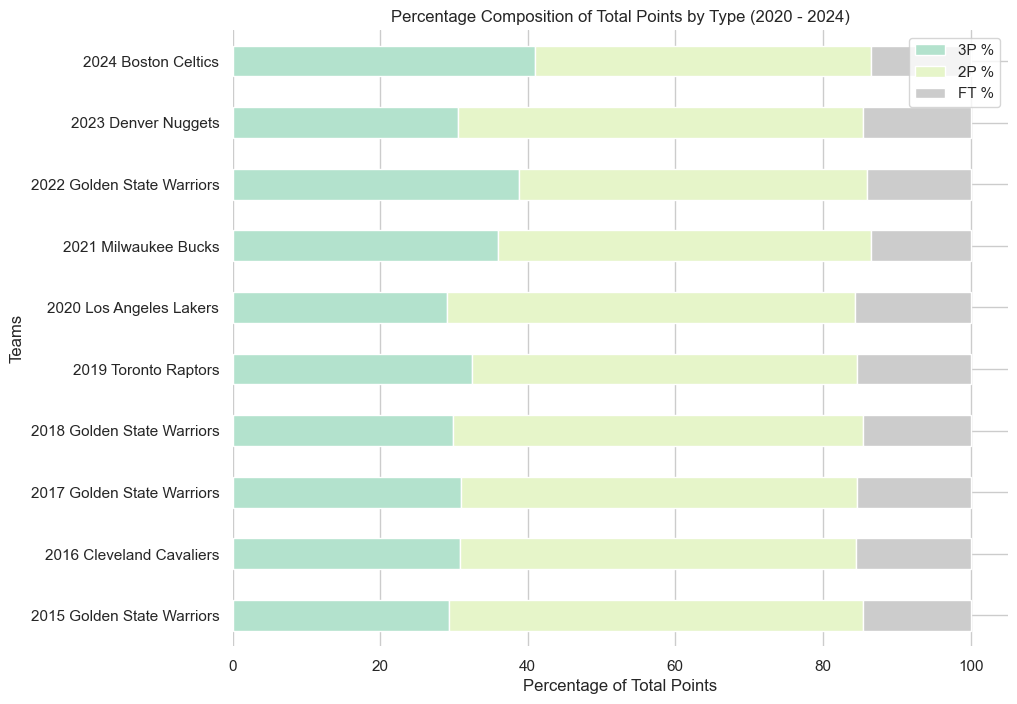

In [103]:
#Points - Top 5 teams
df_team_total_champs['year_champs'] = df_team_total_champs['Year'].astype('str') + str(" ") + df_team_total_champs['Team'].astype('str')
df_champs_pts = df_team_total_champs[df_team_total_champs['champion'] == 1][['year_champs','PTS', '3P', '2P', 'FT', 'FG', 'Year']].sort_values('Year', ascending = False).iloc[:10,:]
df_champs_pts['3P'] = df_champs_pts['3P'] * 3
df_champs_pts['2P'] = df_champs_pts['2P'] * 2 

# Calculate the percentage composition
df_champs_pts['Total Points'] = df_champs_pts[['3P', '2P', 'FT']].sum(axis=1)
df_champs_pts['3P %'] = (df_champs_pts['3P'] / df_champs_pts['Total Points']) * 100
df_champs_pts['2P %'] = (df_champs_pts['2P'] / df_champs_pts['Total Points']) * 100
df_champs_pts['FT %'] = (df_champs_pts['FT'] / df_champs_pts['Total Points']) * 100

# Prepare data for plotting
df_plot = df_champs_pts[['year_champs', '3P %', '2P %', 'FT %', 'Year']].sort_values('Year', ascending = True)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Plot 100% stacked bar chart
df_plot.set_index('year_champs')[['3P %', '2P %', 'FT %']].plot(kind='barh', stacked=True, colormap='Pastel2', ax=ax)

# Add informative axis labels and title
ax.set_xlabel('Percentage of Total Points')
ax.set_ylabel('Teams')
ax.set_title('Percentage Composition of Total Points by Type (2020 - 2024)')

# Remove excess borders for a clean look
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

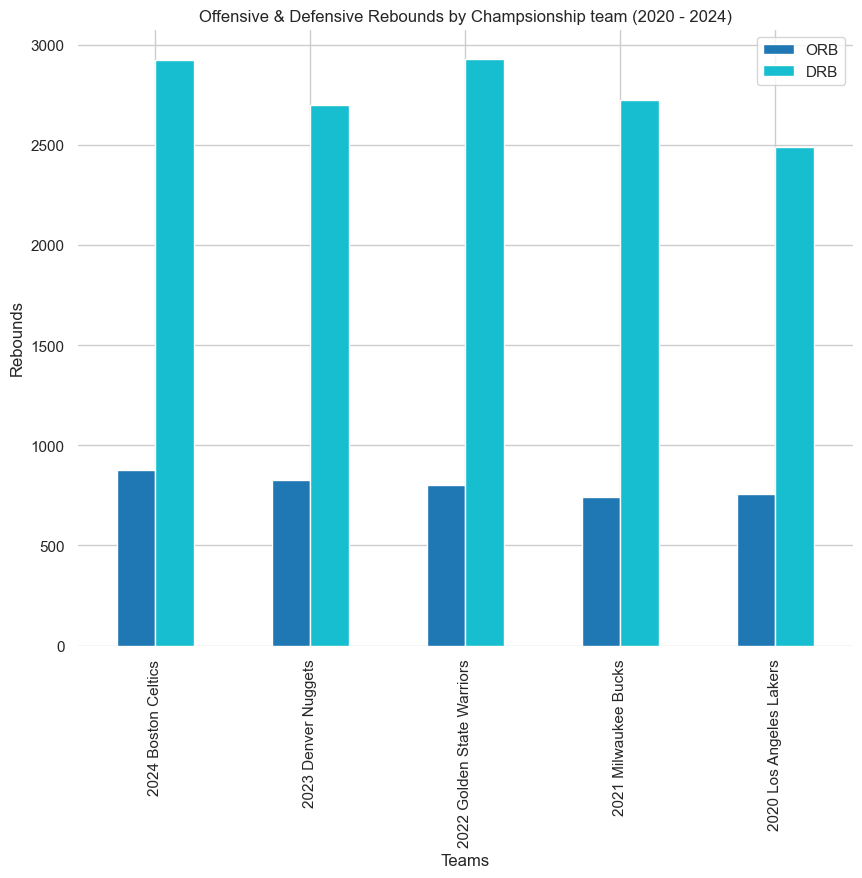

In [104]:
#Points - Top 5 teams
df_team_total_champs['year_champs'] = df_team_total_champs['Year'].astype('str') + str(" ") + df_team_total_champs['Team'].astype('str')
df_champs_pts = df_team_total_champs[df_team_total_champs['champion'] == 1][['year_champs', 'ORB', 'DRB', 'TRB', 'Year']].sort_values('Year', ascending = False).iloc[:5,:]


# Prepare data for plotting
df_plot = df_champs_pts[['year_champs', 'ORB' , 'DRB', 'Year']].sort_values('Year', ascending = False)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Plot 100% stacked bar chart
df_plot.set_index('year_champs')[['ORB', 'DRB']].plot(kind='bar', colormap='tab10', ax=ax)

# Add informative axis labels and title
ax.set_xlabel('Teams')
ax.set_ylabel('Rebounds')
ax.set_title('Offensive & Defensive Rebounds by Champsionship team (2020 - 2024)')

# Remove excess borders for a clean look
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

## Analysis of teams per game metrics
To help better understand the trends of and NBA profile for each year, we will utilize the per game table. The 2018-2019 is creating an outlier and skewing the overall trend. 

Points alone is not the best predictor as we can see from the points graph above, the highest scoring teams did not win the championship. We will merge the advanced and shooting tables with the per game to provide 

In [105]:
df_team_pg.head(2)

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Orlando Magic*,82,243.0,42.2,84.1,0.502,6.4,17.2,0.370,35.8,66.9,0.535,20.1,30.1,0.669,14.0,30.0,44.0,27.8,8.2,6.0,15.8,21.0,110.9,1995
1,Phoenix Suns*,82,241.8,40.9,85.0,0.482,7.1,19.3,0.369,33.8,65.6,0.515,21.7,28.7,0.756,12.5,29.3,41.8,26.8,8.4,3.8,14.2,22.4,110.6,1995


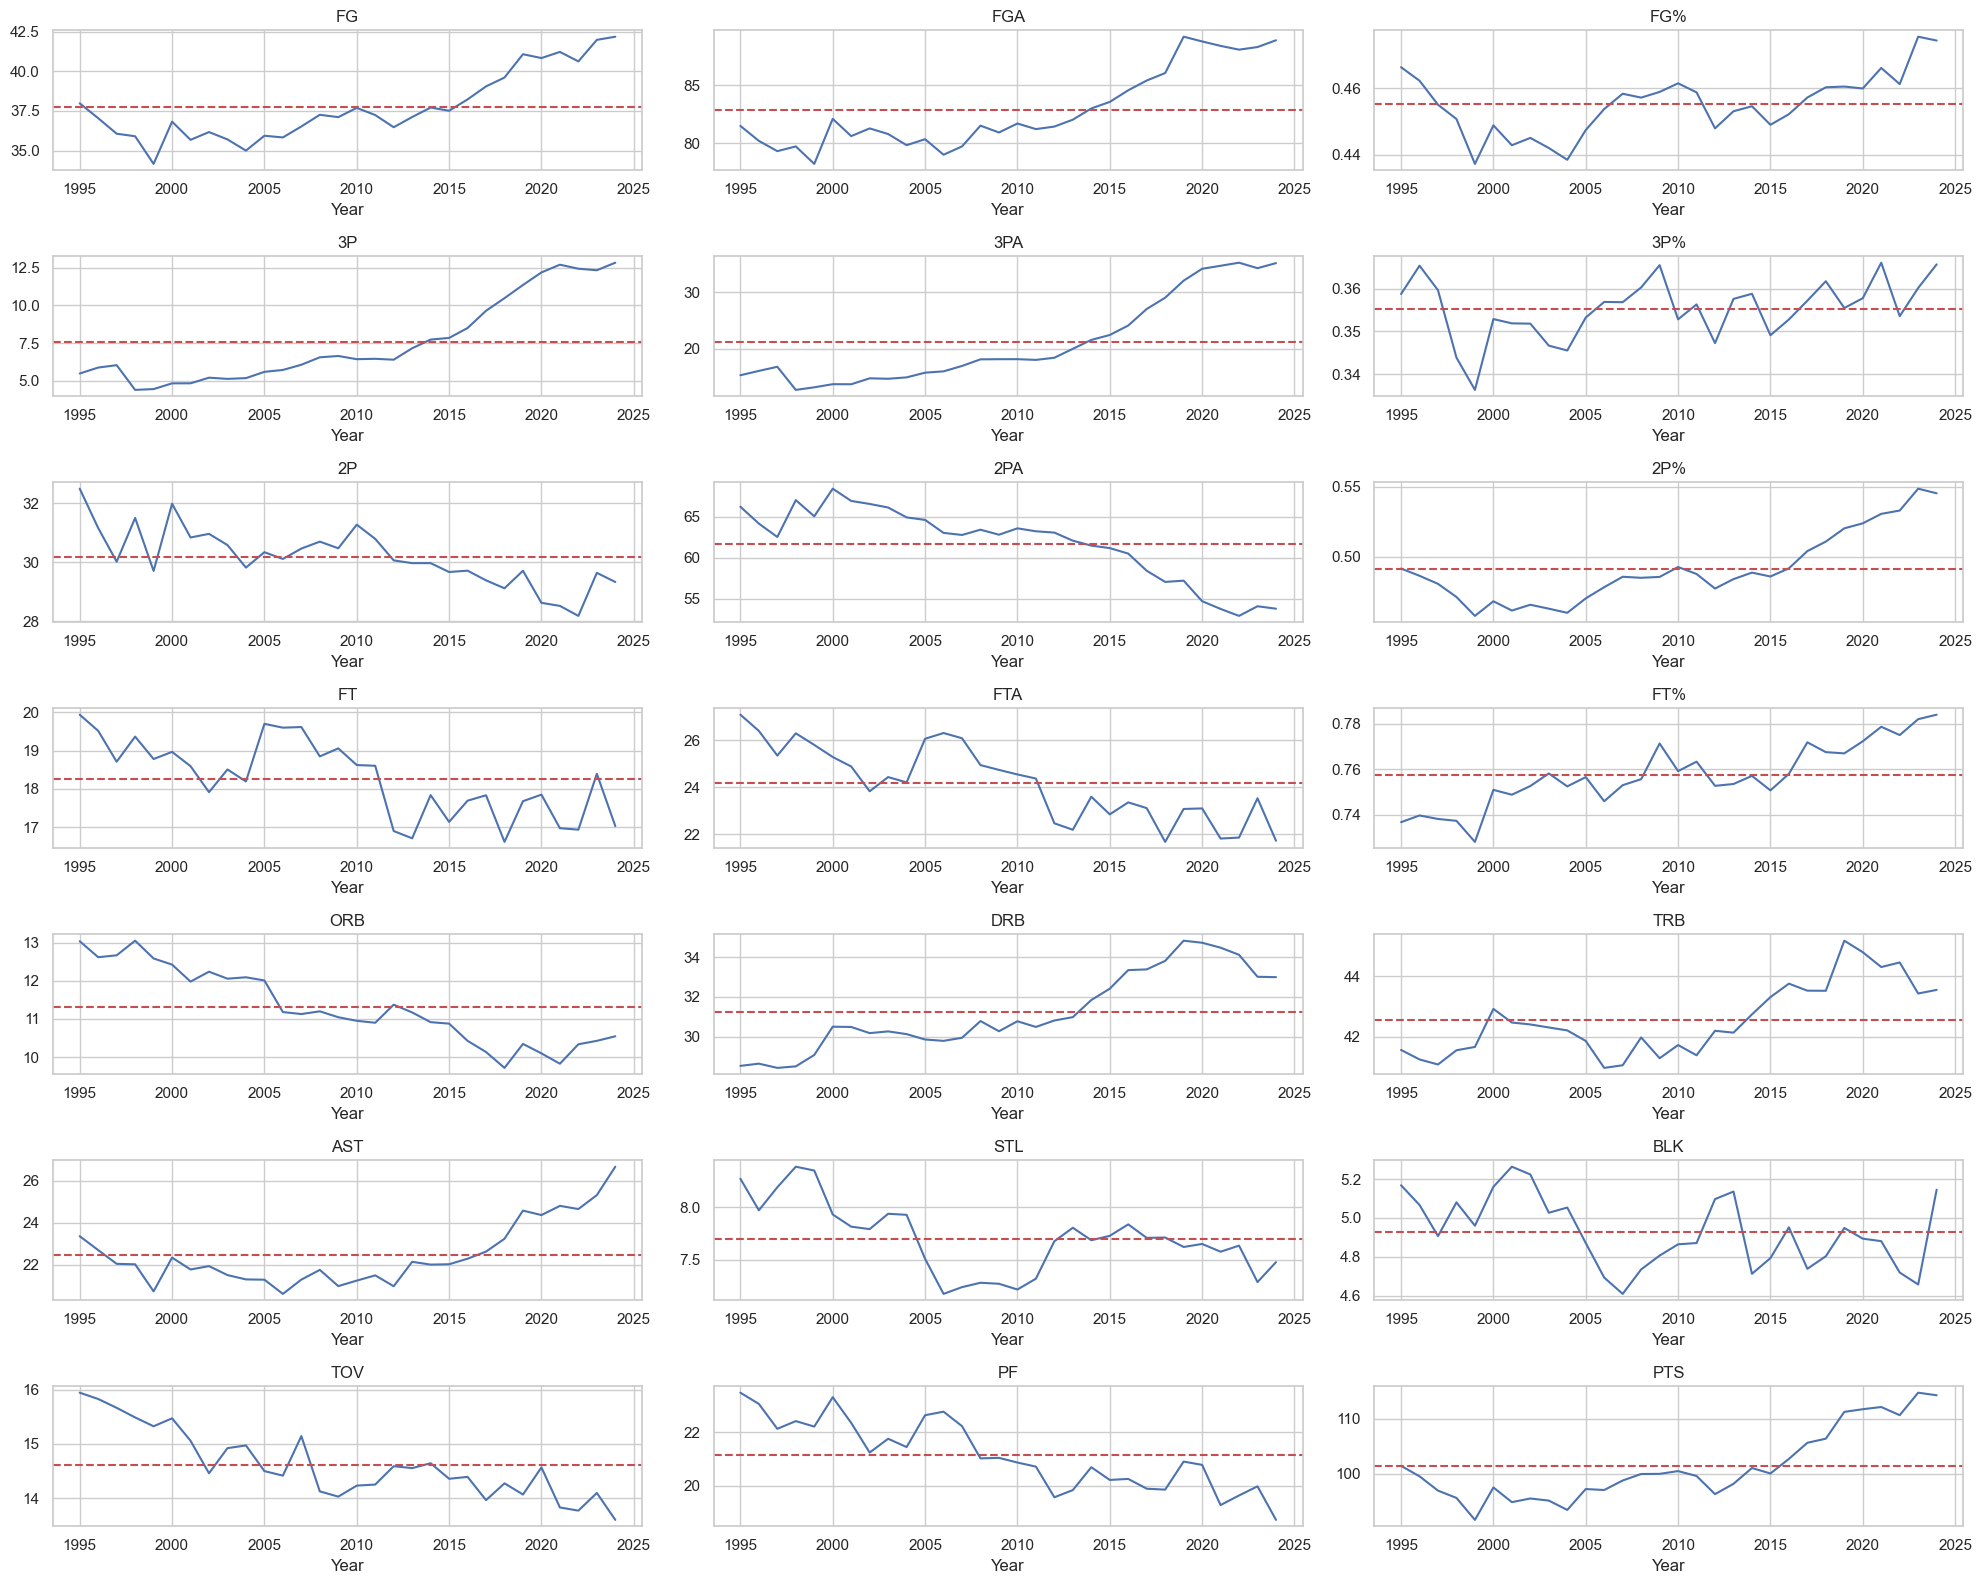

In [106]:
team_plots(df_team_pg)

Similar trends to total stats, but certain columns have a more pronounced trend. An example would be assists per game are greatly higher than the mean in the recent years.

In [107]:
df_team_pg['Team'] = df_team_pg['Team'].str.replace("*","")

df_team_pg_champs = df_team_pg.merge(df_league_champs_adj, how = 'left', on = ['Year', 'Team'], indicator = True)

df_team_pg_champs['champs'] = df_team_pg_champs['_merge'].apply(lambda x: 1 if x == 'both' else 0)

df_team_pg_champs.drop(columns = ['_merge'], inplace = True)

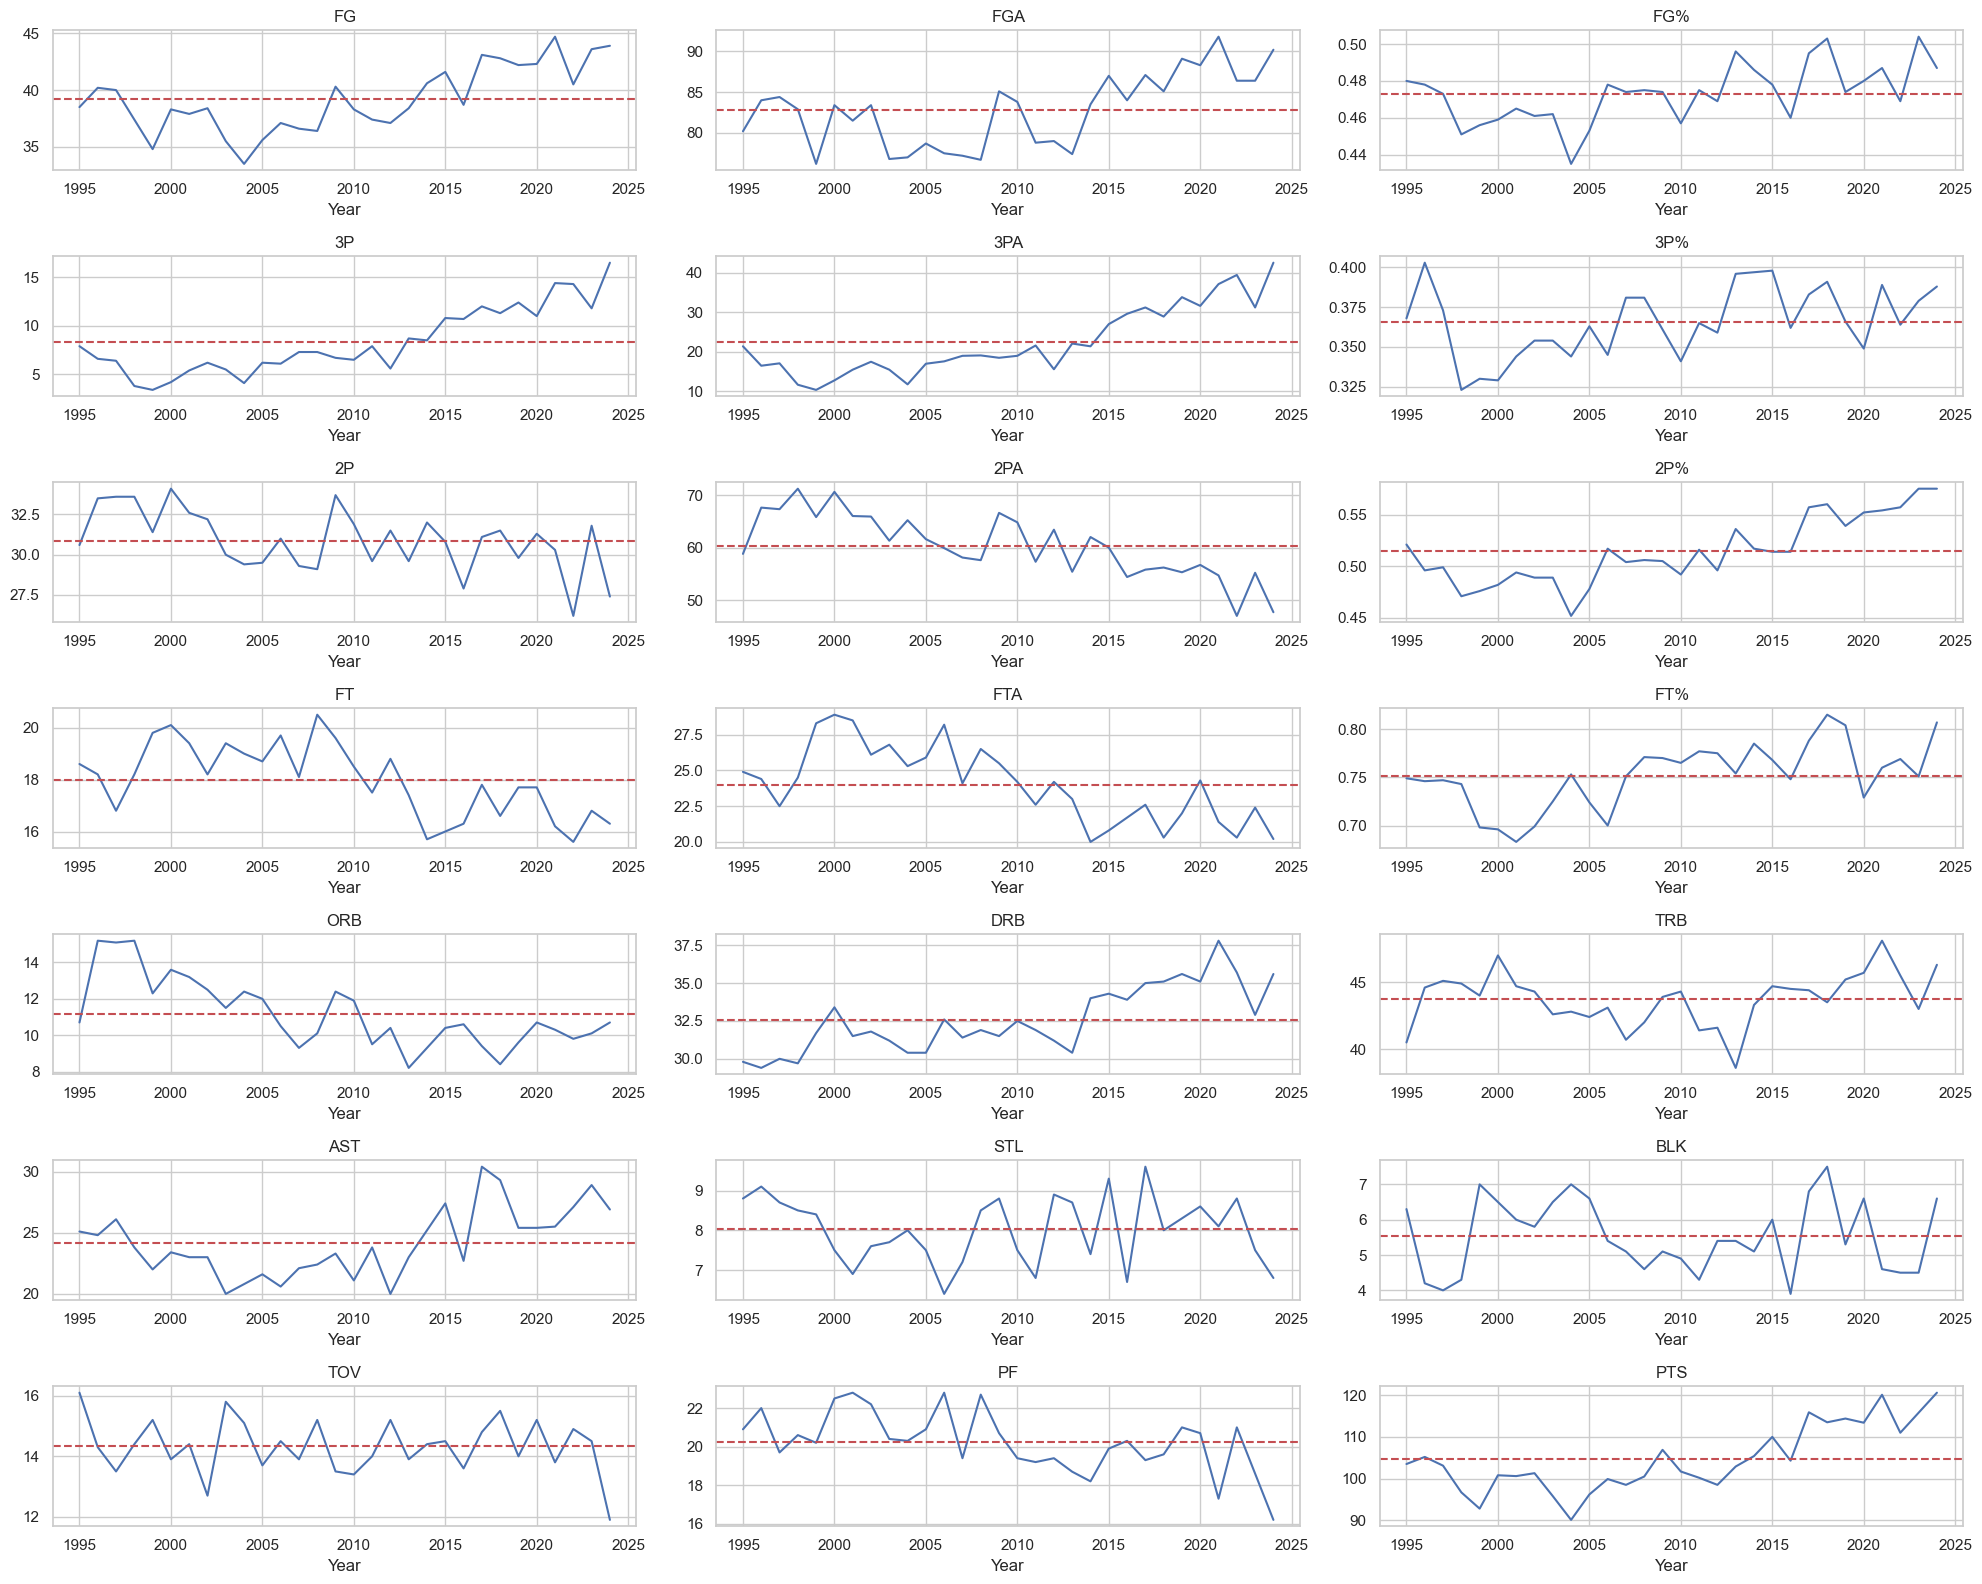

In [108]:
team_plots(df_team_pg_champs[df_team_pg_champs['champs'] == 1].iloc[:,:-1])

In [109]:
df_team_pg.head(2)

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Orlando Magic,82,243.0,42.2,84.1,0.502,6.4,17.2,0.370,35.8,66.9,0.535,20.1,30.1,0.669,14.0,30.0,44.0,27.8,8.2,6.0,15.8,21.0,110.9,1995
1,Phoenix Suns,82,241.8,40.9,85.0,0.482,7.1,19.3,0.369,33.8,65.6,0.515,21.7,28.7,0.756,12.5,29.3,41.8,26.8,8.4,3.8,14.2,22.4,110.6,1995


In [110]:
df_team_advanced.head(2)

,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,O_TOV%,ORB%,O_FT/FGA,D_eFG%,DRB%,D_FT/FGA,Year
0,Utah Jazz*,29.6,60.0,22.0,61,21,7.99,-0.23,7.76,114.3,105.7,8.6,92.6,0.392,0.126,0.587,14.8,29.1,0.306,0.496,72.5,0.292,1995
1,Seattle SuperSonics*,28.7,57.0,25.0,61,21,8.18,-0.27,7.91,114.8,106.3,8.5,95.5,0.380,0.194,0.575,14.1,32.6,0.288,0.492,68.7,0.278,1995


In [111]:
df_team_shooting.head(2)

,Rk,Team,G,MP,FG%,FGA_,FGA_2P,FGA_0-3,FGA_3-10,FGA_10-16,FGA_16-3P,FGA%_,FGA%_2P,FGA%_0-3,FGA%_3-10,FGA%_10-16,FGA%_16-3P,FG_astd_,FG_astd_2P,dunk_ .3,dunk_%FGA,layup_ .4,layup_%FGA,corner_ .5,corner_%3PA,heaves_ .6,heaves_Att.,Md..2,Year
0,1,Atlanta Hawks,82,19780,.439,NaN,.819,.328,.153,.146,.193,NaN,.458,.583,.349,.363,.400,NaN,.525,NaN,.054,NaN,.245,NaN,.255,NaN,5,0,2002
1,2,Boston Celtics*,82,19830,.424,NaN,.711,.293,.124,.111,.182,NaN,.450,.581,.324,.351,.385,NaN,.512,NaN,.032,NaN,.255,NaN,.213,NaN,15,2,2002


Need a to create unique identifier for all 3 tables

In [112]:
#Remove astericks from team name
df_team_pg['Team'] = df_team_pg['Team'].str.replace('*','', regex = False)
df_team_advanced['Team'] = df_team_advanced['Team'].str.replace('*','', regex = False)
#df_team_shooting['Team'] = df_team_shooting['Team'].str.replace('*','', regex = False)

In [113]:
df_team_pg['id'] = df_team_pg['Year'].astype('str') + " " + df_team_pg['Team']
df_team_advanced['id'] = df_team_advanced['Year'].astype('str') + " " + df_team_advanced['Team']
#df_team_shooting['id'] = df_team_shooting['Year'].astype('str') + " " + df_team_shooting['Team']

In [21]:
#Merge shooting and advanced stats
df_team_all = df_team_pg.merge(df_team_advanced, on = 'id', how = 'left')
#df_team_all = df_team_all.merge(df_team_shooting, on = 'id', how = 'left')

KeyError: 'id'

In [115]:
df_team_advanced['Year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

In [116]:
df_team_shooting['Year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024], dtype=int64)

Drop duplicate columns and rename
Duplicate columns:
- Team
- G
- MP
- FG%
- Year

In [236]:
df_team_all[df_team_all['champion'] == 1].sort_values('Year', ascending=False).head(3)

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,id,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,O_TOV%,ORB%,O_FT/FGA,D_eFG%,DRB%,D_FT/FGA,wl_ratio,champion
888,Boston Celtics,82,241.8,43.9,90.2,0.487,16.5,42.5,0.388,27.4,47.7,0.575,16.3,20.2,0.807,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6,2024,2024 Boston Celtics,28.2,64.0,18.0,66,16,11.34,-0.60,10.75,123.2,111.6,11.6,97.2,0.224,0.471,0.609,10.8,24.9,0.180,0.523,76.3,0.145,3.555556,1
867,Denver Nuggets,82,240.9,43.6,86.4,0.504,11.8,31.2,0.379,31.8,55.2,0.575,16.8,22.4,0.751,10.1,32.9,43.0,28.9,7.5,4.5,14.5,18.6,115.8,2023,2023 Denver Nuggets,26.6,53.0,29.0,49,33,3.33,-0.29,3.04,117.6,114.2,3.4,98.1,0.259,0.361,0.601,13.1,24.8,0.194,0.543,76.4,0.201,1.827586,1
839,Golden State Warriors,82,240.6,40.5,86.4,0.469,14.3,39.4,0.364,26.2,47.0,0.557,15.6,20.3,0.769,9.8,35.7,45.5,27.1,8.8,4.5,14.9,21.0,111.0,2022,2022 Golden State Warriors,27.6,53.0,29.0,55,27,5.54,-0.02,5.52,112.5,106.9,5.6,98.4,0.235,0.456,0.582,13.5,22.8,0.181,0.509,78.7,0.201,1.827586,1


In [130]:
#Drop duplicate columns and rename columns
df_team_all.drop(columns = ['Team_y', 'Year_y'], inplace = True)
df_team_all.rename(columns = {'Team_x':'Team', 'Year_x':'Year'}, inplace = True)

In [132]:
df_team_all['wl_ratio'] = df_team_all['W']/df_team_all['L']

In [133]:
#Merge tables with indicator showing whether team won championship
df_team_all = pd.merge(df_team_all, df_league_champs_adj, how = 'left', on = ['Year', 'Team'], indicator = True)

df_team_all['champion'] = df_team_all['_merge'].apply(lambda x: 1 if x == 'both' else 0)

df_team_all.drop(columns = ['_merge'], inplace = True)

In [121]:
df_team_all.to_excel(r'Data\Champion Stat.xlsx', index = False)

In [123]:
df_ranked.to_excel(r'Data\Champion Stat Ranked.xlsx', index = False)

NameError: name 'df_ranked' is not defined

In [136]:
remove_cols = ['Team', 'G', 'MP', 'Year', 'id', ]
df_team_ranks = df_team_all

In [237]:
df_team_all.columns

Index(['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Year', 'id', 'Age', 'W', 'L', 'PW', 'PL', 'MOV',
       'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%',
       'O_TOV%', 'ORB%', 'O_FT/FGA', 'D_eFG%', 'DRB%', 'D_FT/FGA', 'wl_ratio',
       'champion'],
      dtype='object')

In [240]:
# Columns to be removed
remove_cols = ['Team', 'G', 'MP', 'id', 'DRtg']

# Rank all columns except 'DRtg' in descending order (higher values = better rank)
df_ranked = df_team_all[['Year', 'Team', 'id']].join(
    df_team_all.drop(columns=remove_cols).groupby('Year').rank(method='first', ascending=False)
)

# Rank 'DRtg' in ascending order (lower values = better rank)
df_ranked_drtg = df_team_all[['Year', 'DRtg']].groupby('Year')['DRtg'].rank(method='first', ascending=True)

# Join the DRtg ranks back with the main ranked DataFrame
df_ranked = df_ranked.join(df_ranked_drtg, rsuffix='_ranked')

df_ranked.columns


Index(['Year', 'Team', 'id', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS',
       'SRS', 'ORtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'O_TOV%', 'ORB%',
       'O_FT/FGA', 'D_eFG%', 'DRB%', 'D_FT/FGA', 'wl_ratio', 'champion',
       'DRtg'],
      dtype='object')

In [241]:
#Merge tables with indicator showing whether team won championship
df_ranked = pd.merge(df_ranked, df_league_champs_adj, how = 'left', on = ['Year', 'Team'], indicator = True)

df_ranked['champion'] = df_ranked['_merge'].apply(lambda x: 1 if x == 'both' else 0)

df_ranked.drop(columns = ['_merge'], inplace = True)

In [242]:
df_team_all.head(3)

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,id,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,O_TOV%,ORB%,O_FT/FGA,D_eFG%,DRB%,D_FT/FGA,wl_ratio,champion
0,Orlando Magic,82,243.0,42.2,84.1,0.502,6.4,17.2,0.370,35.8,66.9,0.535,20.1,30.1,0.669,14.0,30.0,44.0,27.8,8.2,6.0,15.8,21.0,110.9,1995,1995 Orlando Magic,26.6,57.0,25.0,59,23,7.06,-0.62,6.44,115.1,107.8,7.3,95.1,0.357,0.205,0.569,14.0,34.0,0.239,0.490,68.4,0.220,2.280000,0
1,Phoenix Suns,82,241.8,40.9,85.0,0.482,7.1,19.3,0.369,33.8,65.6,0.515,21.7,28.7,0.756,12.5,29.3,41.8,26.8,8.4,3.8,14.2,22.4,110.6,1995,1995 Phoenix Suns,29.2,59.0,23.0,51,31,3.88,-0.02,3.86,114.5,110.4,4.1,95.9,0.338,0.227,0.567,12.7,29.7,0.255,0.515,69.8,0.228,2.565217,0
2,Seattle SuperSonics,82,241.8,40.4,82.2,0.491,6.0,15.9,0.376,34.4,66.3,0.519,23.7,31.3,0.758,13.0,28.5,41.5,25.8,11.2,4.8,15.8,25.2,110.4,1995,1995 Seattle SuperSonics,28.7,57.0,25.0,61,21,8.18,-0.27,7.91,114.8,106.3,8.5,95.5,0.380,0.194,0.575,14.1,32.6,0.288,0.492,68.7,0.278,2.280000,0


In [146]:
df_ranked.head(3)

,Year,Team,id,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,O_TOV%,ORB%,O_FT/FGA,D_eFG%,DRB%,D_FT/FGA,wl_ratio,champion
0,1995,Orlando Magic,1995 Orlando Magic,1.0,5.0,2.0,7.0,7.0,9.0,2.0,12.0,1.0,11.0,4.0,28.0,5.0,4.0,5.0,1.0,12.0,6.0,17.0,25.0,1.0,18.0,4.0,23.0,3.0,26.0,3.0,28.0,3.0,1.0,16.0,3.0,5.0,7.0,9.0,3.0,22.0,3.0,17.0,21.0,16.0,21.0,4.0,0
1,1995,Phoenix Suns,1995 Phoenix Suns,2.0,4.0,5.0,2.0,3.0,10.0,7.0,17.0,5.0,6.0,7.0,7.0,21.0,9.0,10.0,3.0,10.0,27.0,28.0,20.0,2.0,4.0,3.0,25.0,8.0,21.0,6.0,14.0,6.0,3.0,9.0,6.0,2.0,12.0,4.0,5.0,28.0,20.0,8.0,5.0,8.0,18.0,3.0,0
2,1995,Seattle SuperSonics,1995 Seattle SuperSonics,3.0,10.0,3.0,9.0,11.0,5.0,4.0,14.0,4.0,1.0,1.0,6.0,13.0,13.0,12.0,4.0,1.0,17.0,18.0,5.0,3.0,6.0,5.0,24.0,1.0,27.0,1.0,23.0,1.0,2.0,19.0,2.0,3.0,3.0,11.0,2.0,21.0,8.0,3.0,19.0,10.0,7.0,5.0,0


In [243]:
df_team_all_rank = pd.merge(df_team_all, df_ranked, how = 'left', on = 'id')

In [244]:
df_team_all_rank.head(3)

,Team_x,G,MP,FG_x,FGA_x,FG%_x,3P_x,3PA_x,3P%_x,2P_x,2PA_x,2P%_x,FT_x,FTA_x,FT%_x,ORB_x,DRB_x,TRB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,PTS_x,Year_x,id,Age_x,W_x,L_x,PW_x,PL_x,MOV_x,SOS_x,SRS_x,ORtg_x,DRtg_x,NRtg_x,Pace_x,FTr_x,3PAr_x,TS%_x,O_TOV%_x,ORB%_x,O_FT/FGA_x,D_eFG%_x,DRB%_x,D_FT/FGA_x,wl_ratio_x,champion_x,Year_y,Team_y,FG_y,FGA_y,FG%_y,3P_y,3PA_y,3P%_y,2P_y,2PA_y,2P%_y,FT_y,FTA_y,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PTS_y,Age_y,W_y,L_y,PW_y,PL_y,MOV_y,SOS_y,SRS_y,ORtg_y,NRtg_y,Pace_y,FTr_y,3PAr_y,TS%_y,O_TOV%_y,ORB%_y,O_FT/FGA_y,D_eFG%_y,DRB%_y,D_FT/FGA_y,wl_ratio_y,champion_y,DRtg_y
0,Orlando Magic,82,243.0,42.2,84.1,0.502,6.4,17.2,0.370,35.8,66.9,0.535,20.1,30.1,0.669,14.0,30.0,44.0,27.8,8.2,6.0,15.8,21.0,110.9,1995,1995 Orlando Magic,26.6,57.0,25.0,59,23,7.06,-0.62,6.44,115.1,107.8,7.3,95.1,0.357,0.205,0.569,14.0,34.0,0.239,0.490,68.4,0.220,2.280000,0,1995,Orlando Magic,1.0,5.0,2.0,7.0,7.0,9.0,2.0,12.0,1.0,11.0,4.0,28.0,5.0,4.0,5.0,1.0,12.0,6.0,17.0,25.0,1.0,18.0,4.0,23.0,3.0,26.0,3.0,28.0,3.0,1.0,3.0,5.0,7.0,9.0,3.0,22.0,3.0,17.0,21.0,16.0,21.0,4.0,0,13.0
1,Phoenix Suns,82,241.8,40.9,85.0,0.482,7.1,19.3,0.369,33.8,65.6,0.515,21.7,28.7,0.756,12.5,29.3,41.8,26.8,8.4,3.8,14.2,22.4,110.6,1995,1995 Phoenix Suns,29.2,59.0,23.0,51,31,3.88,-0.02,3.86,114.5,110.4,4.1,95.9,0.338,0.227,0.567,12.7,29.7,0.255,0.515,69.8,0.228,2.565217,0,1995,Phoenix Suns,2.0,4.0,5.0,2.0,3.0,10.0,7.0,17.0,5.0,6.0,7.0,7.0,21.0,9.0,10.0,3.0,10.0,27.0,28.0,20.0,2.0,4.0,3.0,25.0,8.0,21.0,6.0,14.0,6.0,3.0,6.0,2.0,12.0,4.0,5.0,28.0,20.0,8.0,5.0,8.0,18.0,3.0,0,20.0
2,Seattle SuperSonics,82,241.8,40.4,82.2,0.491,6.0,15.9,0.376,34.4,66.3,0.519,23.7,31.3,0.758,13.0,28.5,41.5,25.8,11.2,4.8,15.8,25.2,110.4,1995,1995 Seattle SuperSonics,28.7,57.0,25.0,61,21,8.18,-0.27,7.91,114.8,106.3,8.5,95.5,0.380,0.194,0.575,14.1,32.6,0.288,0.492,68.7,0.278,2.280000,0,1995,Seattle SuperSonics,3.0,10.0,3.0,9.0,11.0,5.0,4.0,14.0,4.0,1.0,1.0,6.0,13.0,13.0,12.0,4.0,1.0,17.0,18.0,5.0,3.0,6.0,5.0,24.0,1.0,27.0,1.0,23.0,1.0,2.0,2.0,3.0,3.0,11.0,2.0,21.0,8.0,3.0,19.0,10.0,7.0,5.0,0,10.0


In [245]:
stat_columns = [col for col in df_team_all_rank.columns if '_x' in col]
for col in stat_columns:
    df_team_all_rank.rename(columns = {col:col.replace('_x','_stat')}, inplace = True)

In [246]:
df_team_all_rank.head(5)

,Team_stat,G,MP,FG_stat,FGA_stat,FG%_stat,3P_stat,3PA_stat,3P%_stat,2P_stat,2PA_stat,2P%_stat,FT_stat,FTA_stat,FT%_stat,ORB_stat,DRB_stat,TRB_stat,AST_stat,STL_stat,BLK_stat,TOV_stat,PF_stat,PTS_stat,Year_stat,id,Age_stat,W_stat,L_stat,PW_stat,PL_stat,MOV_stat,SOS_stat,SRS_stat,ORtg_stat,DRtg_stat,NRtg_stat,Pace_stat,FTr_stat,3PAr_stat,TS%_stat,O_TOV%_stat,ORB%_stat,O_FT/FGA_stat,D_eFG%_stat,DRB%_stat,D_FT/FGA_stat,wl_ratio_stat,champion_stat,Year_y,Team_y,FG_y,FGA_y,FG%_y,3P_y,3PA_y,3P%_y,2P_y,2PA_y,2P%_y,FT_y,FTA_y,FT%_y,ORB_y,DRB_y,TRB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PTS_y,Age_y,W_y,L_y,PW_y,PL_y,MOV_y,SOS_y,SRS_y,ORtg_y,NRtg_y,Pace_y,FTr_y,3PAr_y,TS%_y,O_TOV%_y,ORB%_y,O_FT/FGA_y,D_eFG%_y,DRB%_y,D_FT/FGA_y,wl_ratio_y,champion_y,DRtg_y
0,Orlando Magic,82,243.0,42.2,84.1,0.502,6.4,17.2,0.370,35.8,66.9,0.535,20.1,30.1,0.669,14.0,30.0,44.0,27.8,8.2,6.0,15.8,21.0,110.9,1995,1995 Orlando Magic,26.6,57.0,25.0,59,23,7.06,-0.62,6.44,115.1,107.8,7.3,95.1,0.357,0.205,0.569,14.0,34.0,0.239,0.490,68.4,0.220,2.280000,0,1995,Orlando Magic,1.0,5.0,2.0,7.0,7.0,9.0,2.0,12.0,1.0,11.0,4.0,28.0,5.0,4.0,5.0,1.0,12.0,6.0,17.0,25.0,1.0,18.0,4.0,23.0,3.0,26.0,3.0,28.0,3.0,1.0,3.0,5.0,7.0,9.0,3.0,22.0,3.0,17.0,21.0,16.0,21.0,4.0,0,13.0
1,Phoenix Suns,82,241.8,40.9,85.0,0.482,7.1,19.3,0.369,33.8,65.6,0.515,21.7,28.7,0.756,12.5,29.3,41.8,26.8,8.4,3.8,14.2,22.4,110.6,1995,1995 Phoenix Suns,29.2,59.0,23.0,51,31,3.88,-0.02,3.86,114.5,110.4,4.1,95.9,0.338,0.227,0.567,12.7,29.7,0.255,0.515,69.8,0.228,2.565217,0,1995,Phoenix Suns,2.0,4.0,5.0,2.0,3.0,10.0,7.0,17.0,5.0,6.0,7.0,7.0,21.0,9.0,10.0,3.0,10.0,27.0,28.0,20.0,2.0,4.0,3.0,25.0,8.0,21.0,6.0,14.0,6.0,3.0,6.0,2.0,12.0,4.0,5.0,28.0,20.0,8.0,5.0,8.0,18.0,3.0,0,20.0
2,Seattle SuperSonics,82,241.8,40.4,82.2,0.491,6.0,15.9,0.376,34.4,66.3,0.519,23.7,31.3,0.758,13.0,28.5,41.5,25.8,11.2,4.8,15.8,25.2,110.4,1995,1995 Seattle SuperSonics,28.7,57.0,25.0,61,21,8.18,-0.27,7.91,114.8,106.3,8.5,95.5,0.380,0.194,0.575,14.1,32.6,0.288,0.492,68.7,0.278,2.280000,0,1995,Seattle SuperSonics,3.0,10.0,3.0,9.0,11.0,5.0,4.0,14.0,4.0,1.0,1.0,6.0,13.0,13.0,12.0,4.0,1.0,17.0,18.0,5.0,3.0,6.0,5.0,24.0,1.0,27.0,1.0,23.0,1.0,2.0,2.0,3.0,3.0,11.0,2.0,21.0,8.0,3.0,19.0,10.0,7.0,5.0,0,10.0
3,San Antonio Spurs,82,242.1,39.5,81.5,0.484,5.3,14.1,0.375,34.2,67.4,0.507,22.4,30.3,0.738,12.5,32.5,45.0,23.4,8.0,5.6,15.2,22.8,106.6,1995,1995 San Antonio Spurs,29.0,62.0,20.0,57,25,5.96,-0.06,5.90,111.7,105.4,6.3,94.6,0.372,0.173,0.562,13.8,30.9,0.275,0.485,72.3,0.214,3.100000,0,1995,San Antonio Spurs,5.0,14.0,4.0,15.0,19.0,7.0,6.0,10.0,6.0,3.0,2.0,12.0,22.0,1.0,4.0,12.0,16.0,8.0,22.0,17.0,4.0,5.0,1.0,27.0,4.0,25.0,4.0,17.0,4.0,5.0,4.0,7.0,5.0,19.0,6.0,25.0,18.0,5.0,25.0,4.0,25.0,1.0,0,5.0
4,Utah Jazz,82,241.2,39.5,77.3,0.512,3.7,9.8,0.376,35.9,67.5,0.531,23.6,30.3,0.781,10.7,29.4,40.1,27.5,9.2,4.8,15.7,24.9,106.4,1995,1995 Utah Jazz,29.6,60.0,22.0,61,21,7.99,-0.23,7.76,114.3,105.7,8.6,92.6,0.392,0.126,0.587,14.8,29.1,0.306,0.496,72.5,0.292,2.727273,0,1995,Utah Jazz,6.0,25.0,1.0,28.0,28.0,6.0,1.0,9.0,2.0,2.0,3.0,1.0,26.0,8.0,21.0,2.0,4.0,18.0,20.0,7.0,5.0,1.0,2.0,26.0,2.0,28.0,2.0,22.0,2.0,4.0,1.0,17.0,1.0,28.0,1.0,11.0,23.0,1.0,14.0,2.0,2.0,2.0,0,7.0


In [247]:
stat_columns = [col for col in df_team_all_rank.columns if '_y' in col]
for col in stat_columns:
    df_team_all_rank.rename(columns = {col:col.replace('_y','_rank')}, inplace = True)

In [248]:
df_team_all_rank.head(3)

,Team_stat,G,MP,FG_stat,FGA_stat,FG%_stat,3P_stat,3PA_stat,3P%_stat,2P_stat,2PA_stat,2P%_stat,FT_stat,FTA_stat,FT%_stat,ORB_stat,DRB_stat,TRB_stat,AST_stat,STL_stat,BLK_stat,TOV_stat,PF_stat,PTS_stat,Year_stat,id,Age_stat,W_stat,L_stat,PW_stat,PL_stat,MOV_stat,SOS_stat,SRS_stat,ORtg_stat,DRtg_stat,NRtg_stat,Pace_stat,FTr_stat,3PAr_stat,TS%_stat,O_TOV%_stat,ORB%_stat,O_FT/FGA_stat,D_eFG%_stat,DRB%_stat,D_FT/FGA_stat,wl_ratio_stat,champion_stat,Year_rank,Team_rank,FG_rank,FGA_rank,FG%_rank,3P_rank,3PA_rank,3P%_rank,2P_rank,2PA_rank,2P%_rank,FT_rank,FTA_rank,FT%_rank,ORB_rank,DRB_rank,TRB_rank,AST_rank,STL_rank,BLK_rank,TOV_rank,PF_rank,PTS_rank,Age_rank,W_rank,L_rank,PW_rank,PL_rank,MOV_rank,SOS_rank,SRS_rank,ORtg_rank,NRtg_rank,Pace_rank,FTr_rank,3PAr_rank,TS%_rank,O_TOV%_rank,ORB%_rank,O_FT/FGA_rank,D_eFG%_rank,DRB%_rank,D_FT/FGA_rank,wl_ratio_rank,champion_rank,DRtg_rank
0,Orlando Magic,82,243.0,42.2,84.1,0.502,6.4,17.2,0.370,35.8,66.9,0.535,20.1,30.1,0.669,14.0,30.0,44.0,27.8,8.2,6.0,15.8,21.0,110.9,1995,1995 Orlando Magic,26.6,57.0,25.0,59,23,7.06,-0.62,6.44,115.1,107.8,7.3,95.1,0.357,0.205,0.569,14.0,34.0,0.239,0.490,68.4,0.220,2.280000,0,1995,Orlando Magic,1.0,5.0,2.0,7.0,7.0,9.0,2.0,12.0,1.0,11.0,4.0,28.0,5.0,4.0,5.0,1.0,12.0,6.0,17.0,25.0,1.0,18.0,4.0,23.0,3.0,26.0,3.0,28.0,3.0,1.0,3.0,5.0,7.0,9.0,3.0,22.0,3.0,17.0,21.0,16.0,21.0,4.0,0,13.0
1,Phoenix Suns,82,241.8,40.9,85.0,0.482,7.1,19.3,0.369,33.8,65.6,0.515,21.7,28.7,0.756,12.5,29.3,41.8,26.8,8.4,3.8,14.2,22.4,110.6,1995,1995 Phoenix Suns,29.2,59.0,23.0,51,31,3.88,-0.02,3.86,114.5,110.4,4.1,95.9,0.338,0.227,0.567,12.7,29.7,0.255,0.515,69.8,0.228,2.565217,0,1995,Phoenix Suns,2.0,4.0,5.0,2.0,3.0,10.0,7.0,17.0,5.0,6.0,7.0,7.0,21.0,9.0,10.0,3.0,10.0,27.0,28.0,20.0,2.0,4.0,3.0,25.0,8.0,21.0,6.0,14.0,6.0,3.0,6.0,2.0,12.0,4.0,5.0,28.0,20.0,8.0,5.0,8.0,18.0,3.0,0,20.0
2,Seattle SuperSonics,82,241.8,40.4,82.2,0.491,6.0,15.9,0.376,34.4,66.3,0.519,23.7,31.3,0.758,13.0,28.5,41.5,25.8,11.2,4.8,15.8,25.2,110.4,1995,1995 Seattle SuperSonics,28.7,57.0,25.0,61,21,8.18,-0.27,7.91,114.8,106.3,8.5,95.5,0.380,0.194,0.575,14.1,32.6,0.288,0.492,68.7,0.278,2.280000,0,1995,Seattle SuperSonics,3.0,10.0,3.0,9.0,11.0,5.0,4.0,14.0,4.0,1.0,1.0,6.0,13.0,13.0,12.0,4.0,1.0,17.0,18.0,5.0,3.0,6.0,5.0,24.0,1.0,27.0,1.0,23.0,1.0,2.0,2.0,3.0,3.0,11.0,2.0,21.0,8.0,3.0,19.0,10.0,7.0,5.0,0,10.0


In [56]:
# Define a function that highlights values above the threshold
threshold = 6
def highlight_above_threshold(val):
    color = 'background-color: green' if val < threshold else ''
    return color


# Automatically select numerical columns
numerical_cols = df_ranked.select_dtypes(include=['number']).columns

# Apply the highlight only to numerical columns
styled_df = df_ranked[df_ranked['champion'] == 1].style.applymap(highlight_above_threshold, subset=numerical_cols)

# Display the styled DataFrame in Jupyter (for notebooks)
styled_df.head(5)

NameError: name 'df_ranked' is not defined

### Team Shooting

In [12]:
df_team_shooting.head(5)

,Rk,Team,G,MP,FG%,Dist.,per_FGA_2P,per_FGA_0-3,per_FGA_3-10,per_FGA_10-16,per_FGA_16-3P,per_FGA_3P,FGA%_2P,FGA%_0-3,FGA%_3-10,FGA%_10-16,FGA%_16-3P,FGA%_3P,FG_astd_2P,FG_astd_3P,dunk_%FGA,dunk_Md.,corner_%3PA,corner_3P%,heaves_Att.,heaves_Md.,Year
0,Rk,Team,G,MP,FG%,Dist.,2P,0-3,3-10,10-16,16-3P,3P,2P,0-3,3-10,10-16,16-3P,3P,2P,3P,%FGA,Md.,%3PA,3P%,Att.,Md.,2000
1,1,Atlanta Hawks,82,19830,.441,12.6,.880,.230,.195,.228,.228,.120,.458,.637,.378,.361,.442,.317,.489,.806,.038,236,.128,.452,11,1,2000
2,2,Boston Celtics,82,19730,.444,11.9,.817,.263,.226,.138,.190,.183,.469,.575,.415,.393,.442,.331,.515,.916,.029,188,.252,.349,4,0,2000
3,3,Charlotte Hornets*,82,19780,.449,12.7,.847,.273,.171,.190,.212,.153,.469,.632,.387,.356,.429,.339,.661,.909,.056,340,.179,.335,4,0,2000
4,4,Chicago Bulls,82,19805,.415,13.1,.833,.281,.182,.145,.225,.167,.432,.565,.368,.337,.380,.329,.603,.868,.040,220,.154,.308,6,0,2000


In [13]:
df_team_shooting.drop(columns = ['Rk'], inplace = True)

In [14]:
row_drop = df_team_shooting[df_team_shooting['G'] == 'G'].index
df_team_shooting.drop(row_drop, axis = 0, inplace = True)

In [15]:
df_team_shooting['Team'] = df_team_shooting['Team'].str.replace("*","")

In [16]:
df_team_shooting['id'] = df_team_shooting['Year'].astype('str') + " " + df_team_shooting['Team'].astype('str')

In [17]:
col_range = range(df_team_shooting.columns.get_loc('G'), df_team_shooting.columns.get_loc('Year')+1)
col_df = df_team_shooting.iloc[:,col_range]
for col in col_df:
    df_team_shooting[col] = df_team_shooting[col].astype('float')

In [18]:
col_range = range(df_team_shooting.columns.get_loc('per_FGA_2P'), df_team_shooting.columns.get_loc('Year'))
col_df = df_team_shooting.iloc[:,col_range]
for col in col_df:
    df_team_shooting[col] = df_team_shooting[col]*100

In [20]:
df_team_shooting

,Team,G,MP,FG%,Dist.,per_FGA_2P,per_FGA_0-3,per_FGA_3-10,per_FGA_10-16,per_FGA_16-3P,per_FGA_3P,FGA%_2P,FGA%_0-3,FGA%_3-10,FGA%_10-16,FGA%_16-3P,FGA%_3P,FG_astd_2P,FG_astd_3P,dunk_%FGA,dunk_Md.,corner_%3PA,corner_3P%,heaves_Att.,heaves_Md.,Year,id
1,Atlanta Hawks,82.0,19830.0,0.441,12.6,88.0,23.0,19.5,22.8,22.8,12.0,45.8,63.7,37.8,36.1,44.2,31.7,48.9,80.6,3.8,23600.0,12.8,45.2,1100.0,100.0,2000.0,2000 Atlanta Hawks
2,Boston Celtics,82.0,19730.0,0.444,11.9,81.7,26.3,22.6,13.8,19.0,18.3,46.9,57.5,41.5,39.3,44.2,33.1,51.5,91.6,2.9,18800.0,25.2,34.9,400.0,0.0,2000.0,2000 Boston Celtics
3,Charlotte Hornets,82.0,19780.0,0.449,12.7,84.7,27.3,17.1,19.0,21.2,15.3,46.9,63.2,38.7,35.6,42.9,33.9,66.1,90.9,5.6,34000.0,17.9,33.5,400.0,0.0,2000.0,2000 Charlotte Hornets
4,Chicago Bulls,82.0,19805.0,0.415,13.1,83.3,28.1,18.2,14.5,22.5,16.7,43.2,56.5,36.8,33.7,38.0,32.9,60.3,86.8,4.0,22000.0,15.4,30.8,600.0,0.0,2000.0,2000 Chicago Bulls
5,Cleveland Cavaliers,82.0,19855.0,0.442,11.6,86.4,30.3,16.4,16.1,23.5,13.6,45.3,59.1,35.0,35.0,41.7,37.3,62.2,87.8,4.7,29100.0,20.5,41.0,500.0,0.0,2000.0,2000 Cleveland Cavaliers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,San Antonio Spurs,82.0,19830.0,0.462,13.9,59.9,25.8,20.0,8.8,5.2,40.1,53.9,69.2,44.5,42.7,33.8,34.7,62.5,91.4,6.6,43700.0,23.5,38.4,1600.0,0.0,2024.0,2024 San Antonio Spurs
791,Toronto Raptors,82.0,19805.0,0.471,13.2,63.1,27.0,22.1,8.6,5.4,36.9,54.3,70.2,43.9,40.4,39.7,34.7,58.8,90.3,4.8,31300.0,25.3,38.0,1100.0,0.0,2024.0,2024 Toronto Raptors
792,Utah Jazz,82.0,19805.0,0.467,13.8,59.4,20.1,28.9,7.1,3.3,40.6,54.4,72.5,47.1,41.2,37.2,35.4,54.4,88.2,7.2,48900.0,27.6,39.0,1700.0,0.0,2024.0,2024 Utah Jazz
793,Washington Wizards,82.0,19730.0,0.470,13.8,61.1,24.8,23.6,8.5,4.2,38.9,54.8,73.1,43.5,40.4,38.7,34.8,57.1,84.3,5.7,38300.0,22.2,39.2,1600.0,100.0,2024.0,2024 Washington Wizards


In [19]:
df_team_shooting.dtypes

Team              object
G                float64
MP               float64
FG%              float64
Dist.            float64
per_FGA_2P       float64
per_FGA_0-3      float64
per_FGA_3-10     float64
per_FGA_10-16    float64
per_FGA_16-3P    float64
per_FGA_3P       float64
FGA%_2P          float64
FGA%_0-3         float64
FGA%_3-10        float64
FGA%_10-16       float64
FGA%_16-3P       float64
FGA%_3P          float64
FG_astd_2P       float64
FG_astd_3P       float64
dunk_%FGA        float64
dunk_Md.         float64
corner_%3PA      float64
corner_3P%       float64
heaves_Att.      float64
heaves_Md.       float64
Year             float64
id                object
dtype: object

In [255]:
df_team_all_data = pd.merge(df_team_all_rank,df_team_shooting, how = 'left', on = 'id')

In [256]:
df_team_shooting['Year'].unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020., 2021., 2022., 2023., 2024.])

In [257]:
pd.set_option("display.max_rows", 1000)

In [258]:
df_team_all_data.dtypes

Team_stat         object
G_x                int64
MP_x             float64
FG_stat          float64
FGA_stat         float64
FG%_stat         float64
3P_stat          float64
3PA_stat         float64
3P%_stat         float64
2P_stat          float64
2PA_stat         float64
2P%_stat         float64
FT_stat          float64
FTA_stat         float64
FT%_stat         float64
ORB_stat         float64
DRB_stat         float64
TRB_stat         float64
AST_stat         float64
STL_stat         float64
BLK_stat         float64
TOV_stat         float64
PF_stat          float64
PTS_stat         float64
Year_stat          int64
id                object
Age_stat         float64
W_stat           float64
L_stat           float64
PW_stat            int64
PL_stat            int64
MOV_stat         float64
SOS_stat         float64
SRS_stat         float64
ORtg_stat        float64
DRtg_stat        float64
NRtg_stat        float64
Pace_stat        float64
FTr_stat         float64
3PAr_stat        float64


In [259]:
df_team_all_data.head(3)

,Team_stat,G_x,MP_x,FG_stat,FGA_stat,FG%_stat,3P_stat,3PA_stat,3P%_stat,2P_stat,2PA_stat,2P%_stat,FT_stat,FTA_stat,FT%_stat,ORB_stat,DRB_stat,TRB_stat,AST_stat,STL_stat,BLK_stat,TOV_stat,PF_stat,PTS_stat,Year_stat,id,Age_stat,W_stat,L_stat,PW_stat,PL_stat,MOV_stat,SOS_stat,SRS_stat,ORtg_stat,DRtg_stat,NRtg_stat,Pace_stat,FTr_stat,3PAr_stat,TS%_stat,O_TOV%_stat,ORB%_stat,O_FT/FGA_stat,D_eFG%_stat,DRB%_stat,D_FT/FGA_stat,wl_ratio_stat,champion_stat,Year_rank,...,PTS_rank,Age_rank,W_rank,L_rank,PW_rank,PL_rank,MOV_rank,SOS_rank,SRS_rank,ORtg_rank,NRtg_rank,Pace_rank,FTr_rank,3PAr_rank,TS%_rank,O_TOV%_rank,ORB%_rank,O_FT/FGA_rank,D_eFG%_rank,DRB%_rank,D_FT/FGA_rank,wl_ratio_rank,champion_rank,DRtg_rank,Team,G_y,MP_y,FG%,Dist.,per_FGA_2P,per_FGA_0-3,per_FGA_3-10,per_FGA_10-16,per_FGA_16-3P,per_FGA_3P,FGA%_2P,FGA%_0-3,FGA%_3-10,FGA%_10-16,FGA%_16-3P,FGA%_3P,FG_astd_2P,FG_astd_3P,dunk_%FGA,dunk_Md.,corner_%3PA,corner_3P%,heaves_Att.,heaves_Md.,Year
0,Orlando Magic,82,243.0,42.2,84.1,0.502,6.4,17.2,0.370,35.8,66.9,0.535,20.1,30.1,0.669,14.0,30.0,44.0,27.8,8.2,6.0,15.8,21.0,110.9,1995,1995 Orlando Magic,26.6,57.0,25.0,59,23,7.06,-0.62,6.44,115.1,107.8,7.3,95.1,0.357,0.205,0.569,14.0,34.0,0.239,0.490,68.4,0.220,2.280000,0,1995,...,1.0,18.0,4.0,23.0,3.0,26.0,3.0,28.0,3.0,1.0,3.0,5.0,7.0,9.0,3.0,22.0,3.0,17.0,21.0,16.0,21.0,4.0,0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Phoenix Suns,82,241.8,40.9,85.0,0.482,7.1,19.3,0.369,33.8,65.6,0.515,21.7,28.7,0.756,12.5,29.3,41.8,26.8,8.4,3.8,14.2,22.4,110.6,1995,1995 Phoenix Suns,29.2,59.0,23.0,51,31,3.88,-0.02,3.86,114.5,110.4,4.1,95.9,0.338,0.227,0.567,12.7,29.7,0.255,0.515,69.8,0.228,2.565217,0,1995,...,2.0,4.0,3.0,25.0,8.0,21.0,6.0,14.0,6.0,3.0,6.0,2.0,12.0,4.0,5.0,28.0,20.0,8.0,5.0,8.0,18.0,3.0,0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Seattle SuperSonics,82,241.8,40.4,82.2,0.491,6.0,15.9,0.376,34.4,66.3,0.519,23.7,31.3,0.758,13.0,28.5,41.5,25.8,11.2,4.8,15.8,25.2,110.4,1995,1995 Seattle SuperSonics,28.7,57.0,25.0,61,21,8.18,-0.27,7.91,114.8,106.3,8.5,95.5,0.380,0.194,0.575,14.1,32.6,0.288,0.492,68.7,0.278,2.280000,0,1995,...,3.0,6.0,5.0,24.0,1.0,27.0,1.0,23.0,1.0,2.0,2.0,3.0,3.0,11.0,2.0,21.0,8.0,3.0,19.0,10.0,7.0,5.0,0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
df_team_all_data.dtypes

Team_stat         object
G_x                int64
MP_x             float64
FG_stat          float64
FGA_stat         float64
FG%_stat         float64
3P_stat          float64
3PA_stat         float64
3P%_stat         float64
2P_stat          float64
2PA_stat         float64
2P%_stat         float64
FT_stat          float64
FTA_stat         float64
FT%_stat         float64
ORB_stat         float64
DRB_stat         float64
TRB_stat         float64
AST_stat         float64
STL_stat         float64
BLK_stat         float64
TOV_stat         float64
PF_stat          float64
PTS_stat         float64
Year_stat          int64
id                object
Age_stat         float64
W_stat           float64
L_stat           float64
PW_stat            int64
PL_stat            int64
MOV_stat         float64
SOS_stat         float64
SRS_stat         float64
ORtg_stat        float64
DRtg_stat        float64
NRtg_stat        float64
Pace_stat        float64
FTr_stat         float64
3PAr_stat        float64


In [262]:
df_team_all_data.to_excel(r'Data\Champion Stats All.xlsx', index = False)


## Player Data

In [6]:
#import data files
df_player_pg = pd.read_csv('data/player_pg.csv')
df_player_advanced = pd.read_csv('data/player_advanced.csv')
df_player_shooting = pd.read_csv('data/player_shooting.csv')

### Player Per Game Data Cleaning

In [7]:
df_player_pg['Year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

In [8]:
df_player_pg.head(2)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,26.0,TOT,54.0,0.0,9.4,2.2,4.3,0.511,...,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995
1,Alaa Abdelnaby,PF,26.0,SAC,51.0,0.0,9.3,2.3,4.3,0.532,...,0.7,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995


List of team Names and abreviation 

Atlanta Hawks - ATL <br>
Boston Celtics - BOS <br>
Brooklyn Nets - BKN <br>
New Jersey Nets - NJN <br>
Charlotte Hornets - CHA <br>
Chicago Bulls - CHI <br>
Cleveland Cavaliers - CLE <br>
Dallas Mavericks - DAL <br>
Denver Nuggets - DEN <br>
Detroit Pistons - DET <br>
Golden State Warriors - GSW <br>
Houston Rockets - HOU <br>
Indiana Pacers - IND <br>
Los Angeles Clippers - LAC <br>
Los Angeles Lakers - LAL <br>
Memphis Grizzlies - MEM <br>
Miami Heat - MIA <br>
Milwaukee Bucks - MIL <br>
Minnesota Timberwolves - MIN <br>
New Orleans Pelicans - NOP <br>
Charlotte Hornets - CHH <br>
New Orleans Hornets - NOH <br>
New Orleans/Oklahoma City Hornets - NOK <br>
New York Knicks - NYK <br>
Oklahoma City Thunder - OKC <br>
Seattle SuprSonics - SEA <br>
Orlando Magic - ORL <br>
Philadelphia 76ers - PHI <br>
Phoenix Suns - PHX <br>
Portland Trail Blazers - POR <br>
Sacramento Kings - SAC  <br>
San Antonio Spurs - SAS <br>
Toronto Raptors - TOR <br>
Utah Jazz - UTA <br>
Washington Wizards - WAS <br>
Vancouver Grizzlies - VAN <br>

Exception
2004-2014 --> CHA - Charlotte Bobcats



In [9]:
nba_teams = {
    "ATL": "Atlanta Hawks",
    "BOS": "Boston Celtics",
    "BKN": "Brooklyn Nets",
    "NJN": "New Jersey Nets",
    "CHA": "Charlotte Hornets",
    "CHI": "Chicago Bulls",
    "CLE": "Cleveland Cavaliers",
    "DAL": "Dallas Mavericks",
    "DEN": "Denver Nuggets",
    "DET": "Detroit Pistons",
    "GSW": "Golden State Warriors",
    "HOU": "Houston Rockets",
    "IND": "Indiana Pacers",
    "LAC": "Los Angeles Clippers",
    "LAL": "Los Angeles Lakers",
    "MEM": "Memphis Grizzlies",
    "MIA": "Miami Heat",
    "MIL": "Milwaukee Bucks",
    "MIN": "Minnesota Timberwolves",
    "NOP": "New Orleans Pelicans",
    "CHH": "Charlotte Hornets",
    "NOH": "New Orleans Hornets",
    "NOK": "New Orleans/Oklahoma City Hornets",
    "NYK": "New York Knicks",
    "OKC": "Oklahoma City Thunder",
    "SEA": "Seattle SuperSonics",
    "ORL": "Orlando Magic",
    "PHI": "Philadelphia 76ers",
    "PHX": "Phoenix Suns",
    "PHO": "Phoenix Suns",
    "POR": "Portland Trail Blazers",
    "SAC": "Sacramento Kings",
    "SAS": "San Antonio Spurs",
    "TOR": "Toronto Raptors",
    "UTA": "Utah Jazz",
    "WAS": "Washington Wizards",
    "VAN": "Vancouver Grizzlies",
    "TOT": "Multiple Teams",
    "WSB": "Washington Bullets",
    "BRK": "Brooklyn Nets",
    "CHO": "Charlotte Hornets"
    
}


In [10]:
df_player_pg['Tm'].unique()

array(['TOT', 'SAC', 'PHI', 'DEN', 'CHH', 'DET', 'PHO', 'GSW', 'ATL',
       'NJN', 'ORL', 'SAS', 'NYK', 'CHI', 'SEA', 'MIA', 'MIL', nan, 'CLE',
       'UTA', 'BOS', 'LAL', 'HOU', 'DAL', 'MIN', 'POR', 'WSB', 'IND',
       'LAC', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC',
       'BRK', 'NOP', 'CHO'], dtype=object)

In [11]:
for team in df_player_pg['Tm'].unique():
    # Use .get() to handle missing or unknown keys
    nba_team = nba_teams.get(team, 'Unknown Team')  # Replace 'Unknown Team' as needed
    # Update DataFrame with the found value, ensuring NaNs are not overwritten
    df_player_pg.loc[df_player_pg['Tm'] == team, 'Team'] = nba_team

In [12]:
df_player_pg['id'] = df_player_pg['Year'].astype('str') + " " + df_player_pg['Team'].astype('str')

In [13]:
df_player_advanced.head(2)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,Alaa Abdelnaby,PF,26.0,TOT,54.0,506.0,12.6,0.519,0.009,0.152,...,25.6,-0.4,0.7,0.3,0.027,-4.4,0.1,-4.3,-0.3,1995
1,Alaa Abdelnaby,PF,26.0,SAC,51.0,476.0,14.1,0.540,0.009,0.159,...,25.7,-0.1,0.7,0.6,0.058,-3.6,0.5,-3.1,-0.1,1995


In [14]:
df_player_merge = df_player_pg.merge(df_player_advanced, on = ['Player','Tm'], how = 'inner')

In [15]:
df_player_merge.head(3)

,Player,Pos_x,Age_x,Tm,G_x,GS,MP_x,FG,FGA,FG%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year_y
0,Alaa Abdelnaby,PF,26.0,TOT,54.0,0.0,9.4,2.2,4.3,0.511,...,25.6,-0.4,0.7,0.3,0.027,-4.4,0.1,-4.3,-0.3,1995
1,Alaa Abdelnaby,PF,26.0,SAC,51.0,0.0,9.3,2.3,4.3,0.532,...,25.7,-0.1,0.7,0.6,0.058,-3.6,0.5,-3.1,-0.1,1995
2,Alaa Abdelnaby,PF,26.0,PHI,3.0,0.0,10.0,0.3,3.7,0.091,...,23.8,-0.3,0.0,-0.3,-0.466,-17.6,-7.3,-24.9,-0.2,1995


In [19]:
df_player_merge.columns

Index(['Player', 'Pos_x', 'Age_x', 'Tm', 'G_x', 'GS', 'MP_x', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Year_x', 'Team', 'id', 'Pos_y', 'Age_y', 'G_y', 'MP_y', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Year_y'],
      dtype='object')

In [20]:
df_player_merge.rename(columns = {'Year_x': 'Year'}, inplace = True)

In [21]:
#Merge tables with indicator showing whether team won championship
df_player_merge = pd.merge(df_player_merge, df_league_champs_adj, how = 'left', on = ['Year', 'Team'], indicator = True)

df_player_merge['champion'] = df_player_merge['_merge'].apply(lambda x: 1 if x == 'both' else 0)

df_player_merge.drop(columns = ['_merge'], inplace = True)


In [25]:
df_player_merge_adj = df_player_merge[(df_player_merge['champion'] == 1) & (df_player_merge['Year'].between(2000,2024))].reset_index()

In [26]:
df_player_merge_adj.to_excel('Data\Player Stats.xlsx', index = False)

We will be using top 3 players on each team by points to showcase in visualization. This will provide a snapshot of main scoring strategy per championship team.

First task is to change the 'Tm' column to 'Team' and change all initials of team to the full length team in order to add a champsionship column to filter by.

What columns do we want to show? Brainstorm
- Points per game
- Shooting effiency (2p, 3p , ft)
- Points by 2 points, 3 points , free throw
- Rebounds per game
- Assit per game

- offensive win shares
- defensive win shares
- total win shares
- usage percentage
